In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import json
#import statsmodels.formula.api as sm
import requests

pd.set_option('display.max_columns',None)
#pd.set_option('max_columns',None)

In [3]:
# Cambiando estilo de matplotlib
mpl.style.use('bmh')

### Data Frame 1: "Google Playstore Apps"

### Variables de Interés
**App:** Nombre de la aplicación. <br>
**Category:** Categoría de la aplicación.<br>
**Rating:** Calificación general de la aplicación.<br>
**Reviews:** Revisiones totales conseguidas.<br>
**Size:** Tamaño de la aplicación.<br>
**Installs:** Instalaciones desde Google Playstore.<br>
**Type:** Tipo de aplicación.<br>
**Price:** Precio.<br>
**Content Rating:** Población a la que está dirigida la aplicación.<br>
**Andriod Version:** Versión del dispositivo de Android requerida.<br>


## Abstract

### Spanish

En un mundo donde las aplicaciones de celular son cada vez mas utilizadas, entender el contexto de cuales son las mas descargadas y utilizadas es de suma importancia a la hora de desarrollar una nueva aplicacion que sea de significancia para el mercado. <br>
El presente trabajo tiene el objetivo de mostrar como se relacionan las diferentes instalaciones de aplicaciones android, buscando encontrar relaciones entre las distintas variables para asi sacar conclusiones de cuales son las mas populares, cuales se instalan con mas frecuencia, cual es la categoria mas descargada, cuales estan mejor rankeadas, la aceptacion del publico, entre otras. <br>
El trabajo esta dirigido a toda persona u organizacion que este planeando sacar una aplicacion al mercado, para asi evaluar si lo que se planea desarrollar tendra un impacto significativo y sera bien recibido por el publico pertinente. <br>
Para la investigacion se utilizaron diversos metodos cientificos y estadisticos, entre ellos la utilizacion de librerias python como pandas, numpy, matplotlib, seaborn y statsmodels, mediante las cuales se realizo una limpieza los datos y se confeccionaron diferentes graficos para los distintos analisis, obteniendo asi las conclusiones necesarias para las preguntas planteadas.
Tambien se realizo un modelo de regresion lineal para entender la relacion entre algunas de las variables y observar si la relacion entre las mismas era o no signiticativa. Logrando asi, poder predecir
como se desenvolvera una aplicacion en base al valor de las variables establecidas, siendo de gran importancia a la hora de conocer la viabilidad de una aplicacion.


### English

In a world where mobile applications are increasingly used, understanding the context of which are the most downloaded and used is of the utmost importance when developing a new application that is significant for the market. <br>
The present work has the objective of showing how the different installations of android applications are related, seeking to find relationships between the different variables in order to draw conclusions about which are the most popular, which are installed more frequently, which is the most downloaded category, which are better ranked, the acceptance of the public, among others. <br>
The work is addressed to any person or organization that is planning to bring an application to the market, in order to evaluate if what is planned to be developed will have a significant impact and will be well received by the relevant public. <br>
For the investigation, various scientific and statistical methods were used, including the use of python libraries such as pandas, numpy, matplotlib, seaborn and statsmodels, through which the data was cleaned and different graphs were made for the different analyzes, thus obtaining the necessary conclusions for the questions posed.
A linear regression model was also carried out to understand the relationship between some of the variables and to see if the relationship between them was significant or not. Achieving thus, to be able to predict how an application will develop based on the value of the established variables, being of great importance when it comes to knowing the viability of an application.

### Objetivo

El objetivo del siguiente trabajo es analizar la informacion referente a distintas aplicaciones android y entender cual es la mejor opcion a la hora de lanzar una nueva aplicacion al mercado, basados en la categoria de la aplicacion, arting, reviews e instalaciones de las mismas.

### Contexto Comercial

Trabaja para una consultora cuyo equipo trabaja en asesorar software factories en diferentes aspectos. En este caso, lo contrataron para entender cuál sería la mejor alternativa para sacar una aplicacion al mercado y para ello, se lleva a cabo un análisis con un data set de aplicaciones android existentes.

### Problema Comercial

Se requiere un análisis para entender qué tipo de aplicación será la más efectiva y será mejor aceptada por el público.

### Contexto Analítico

Se obtuvo de un data set publico publicado por android con diversa información de diferentes aplicaciones existentes en Play Store. La misma será utilizada para obtener diferentes conclusiones y variables de interés, para luego generar insights y aplicar un modelo de Machine Learning con el objetivo de predecir cuál sera el desempeño de una aplicación.

### Exploración de Datos (EDA)

In [4]:
#Reading from the Data Frame for "Google Playstore Apps"

# Reading from Apps DF

url = 'https://drive.google.com/file/d/1p4O0HAE1BCmc-hY5qMDspetZx1RZbtG5/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_app = pd.read_csv(dwn_url)
df_app.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
#df_app.shape
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# Limpio el + al final de la columna Installs para luego convertirlo en tipo Integer
df_app['Installs'] = df_app['Installs'].str.rstrip("+")
df_app['Installs'] = df_app['Installs'].str.replace(",","")
df_app = df_app[df_app['Installs'] != 'Free'] # Limpio el dato erroneo Free que se encuentra en Installs
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df_app[['Genre1','Genre2']] = df_app['Genres'].str.split(";",expand = True)

In [8]:
df_app = df_app.drop(columns='Genres')

In [9]:
df_app['Price'] = df_app['Price'].str.replace('$','',regex=True)

In [10]:
df_app[df_app['Price'] != '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1,Genre2
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,4.99,Everyone,"March 25, 2018",1.5.2,4.0 and up,Business,None
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,4.99,Everyone,"April 11, 2017",3.4.6,3.0 and up,Business,None
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,4.99,Everyone,"March 25, 2018",1.5.2,4.0 and up,Business,None
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,4.99,Everyone,"April 11, 2017",3.4.6,3.0 and up,Business,None
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,"July 5, 2018",7.5.3.20547,4.1 and up,Communication,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157k,100,Paid,0.99,Mature 17+,"November 25, 2015",1.2,2.1 and up,Entertainment,None
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000,Paid,7.99,Everyone,"August 8, 2018",1.9.3,4.2 and up,Health & Fitness,None
10782,Trine 2: Complete Story,GAME,3.8,252,11M,10000,Paid,16.99,Teen,"February 27, 2015",2.22,5.0 and up,Action,None
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,10000,Paid,1.20,Everyone,"June 5, 2018",2.7,2.3 and up,Puzzle,None


In [11]:
#modificamos el data set ya que contiene informacion en formato string que no sirve para nuestro analisis en ese formato.

df_app['Reviews'] = df_app['Reviews'].astype('int64') 
df_app['Installs'] = df_app['Installs'].astype('int64')
df_app['Last Updated'] = pd.to_datetime(df_app['Last Updated'])
df_app['Price'] = df_app['Price'].astype('float64')



#df_top_10_rating[df_top_10_rating['App'] == '/u/app']

In [12]:
# Corro info para ver que el dato ahora sea Int para Installs, datetime para Last Updated
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Last Updated    10840 non-null  datetime64[ns]
 10  Current Ver     10832 non-null  object        
 11  Android Ver     10838 non-null  object        
 12  Genre1          10840 non-null  object        
 13  Genre2          498 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)


In [13]:
# Limpio espacios en Size
df_app['Size'] = df_app['Size'].str.strip()

In [14]:
# transformo los M y los k en bytes
df_app['Size'] = df_app['Size'].replace(regex='k',value='x1000')
df_app['Size'] = df_app['Size'].replace(regex='M',value='x1000000')

In [15]:
# Separo en Size sin el multiplicador y el multiplicador en columnas separadas para luego multiplicarlas
df_app[['New_Size','Multiplier']] = df_app['Size'].str.split("x",expand = True)

In [16]:
df_app_filtered_sizes = df_app.copy()

In [17]:
# Filtro los que tienen strings no numericos, para asi poder transformar en numerico los sizes
df_app_filtered_sizes = df_app_filtered_sizes[df_app_filtered_sizes['Size'] != 'Varies with device']
df_app_filtered_sizes = df_app_filtered_sizes[df_app_filtered_sizes['Size'] != '1,000+']

In [18]:
df_app_filtered_sizes['New_Size'] = df_app_filtered_sizes['New_Size'].astype('float64')
df_app_filtered_sizes['Multiplier'] = df_app_filtered_sizes['Multiplier'].astype('int64')
df_app_filtered_sizes.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1,Genre2,New_Size,Multiplier
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19x1000000,10000,Free,0.0,Everyone,2018-01-07,1.0.0,4.0.3 and up,Art & Design,None,19.0,1000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14x1000000,500000,Free,0.0,Everyone,2018-01-15,2.0.0,4.0.3 and up,Art & Design,Pretend Play,14.0,1000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7x1000000,5000000,Free,0.0,Everyone,2018-08-01,1.2.4,4.0.3 and up,Art & Design,None,8.7,1000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25x1000000,50000000,Free,0.0,Teen,2018-06-08,Varies with device,4.2 and up,Art & Design,None,25.0,1000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8x1000000,100000,Free,0.0,Everyone,2018-06-20,1.1,4.4 and up,Art & Design,Creativity,2.8,1000000


In [19]:
# Multiplico el size por el multiplicador para asi obtener el correcto valor en bytes
df_app_filtered_sizes['Size'] = df_app_filtered_sizes['New_Size']*df_app_filtered_sizes['Multiplier']

In [20]:
df_app_filtered_sizes.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1,Genre2,New_Size,Multiplier
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,2018-01-07,1.0.0,4.0.3 and up,Art & Design,None,19.0,1000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,2018-01-15,2.0.0,4.0.3 and up,Art & Design,Pretend Play,14.0,1000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,2018-08-01,1.2.4,4.0.3 and up,Art & Design,None,8.7,1000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,2018-06-08,Varies with device,4.2 and up,Art & Design,None,25.0,1000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,2018-06-20,1.1,4.4 and up,Art & Design,Creativity,2.8,1000000


In [21]:
# contando los datos nulos
df_app_filtered_sizes.isna().sum()

App                  0
Category             0
Rating            1416
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Last Updated         0
Current Ver          8
Android Ver          2
Genre1               0
Genre2            8713
New_Size             0
Multiplier           0
dtype: int64

In [22]:
# Reading from User Reviews DF

url = 'https://drive.google.com/file/d/1RHIrACPy-rc0UVEQuNh7gSjqTnubtHEu/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_reviews = pd.read_csv(dwn_url)
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [23]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Last Updated    10840 non-null  datetime64[ns]
 10  Current Ver     10832 non-null  object        
 11  Android Ver     10838 non-null  object        
 12  Genre1          10840 non-null  object        
 13  Genre2          498 non-null    object        
 14  New_Size        10840 non-null  object        
 15  Mu

In [24]:
# contando los datos nulos
df_reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

Ideas:

agrupar por categoria y mostrar las que mas instalaciones tienen

agrupar por tipo y mostrar los que mas isntalaciones tienen

agrupar por categorias y mostrar que generos lo utilizan mas

agrupar por App y contar las diferentes categorias (Sentiment)

agrupar por aplicacion y mostrar cual tiene mejor rating

agrupar por aplicacion y mostrar cual tiene mejores reviews

### Pregunta 1: ¿Cual es la aplicación con mejor rating?

In [25]:
# Genero un data set sin nulos, para asi no obtener resultados erroneos al utilizar la columna rating
df_no_nulls_rating = df_app_filtered_sizes.dropna(subset=['Rating'])

In [26]:
# Verifico que no haya nulos en la columna rating
df_no_nulls_rating.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Last Updated         0
Current Ver          4
Android Ver          2
Genre1               0
Genre2            7312
New_Size             0
Multiplier           0
dtype: int64

In [27]:
# Verifico efectivamente que, los nulos que voy a quitar mas lo que resta de rating da igual al total de filas del dataset.
df_app_filtered_sizes.shape[0] - (df_app_filtered_sizes.isnull().sum()['Rating'] + df_no_nulls_rating.count()['Rating'])

0

C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\1532941437.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  rating_mean = df_no_nulls_rating.mean()
C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\1532941437.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rating_mean = df_no_nulls_rating.mean()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AC DC Power Monitor'),
  Text(1, 0, 'BV Mobile Apps'),
  Text(2, 0, 'FK CLASSIC FOR YOU'),
  Text(3, 0, 'ES Solar'),
  Text(4, 0, 'FK Dedinje BGD'),
  Text(5, 0, 'BV Sridhara Maharaj'),
  Text(6, 0, 'CZ Kompas'),
  Text(7, 0, 'ES Billing System (Offline App)'),
  Text(8, 0, 'BV'),
  Text(9, 0, 'Dr. ES PV Calculator')])

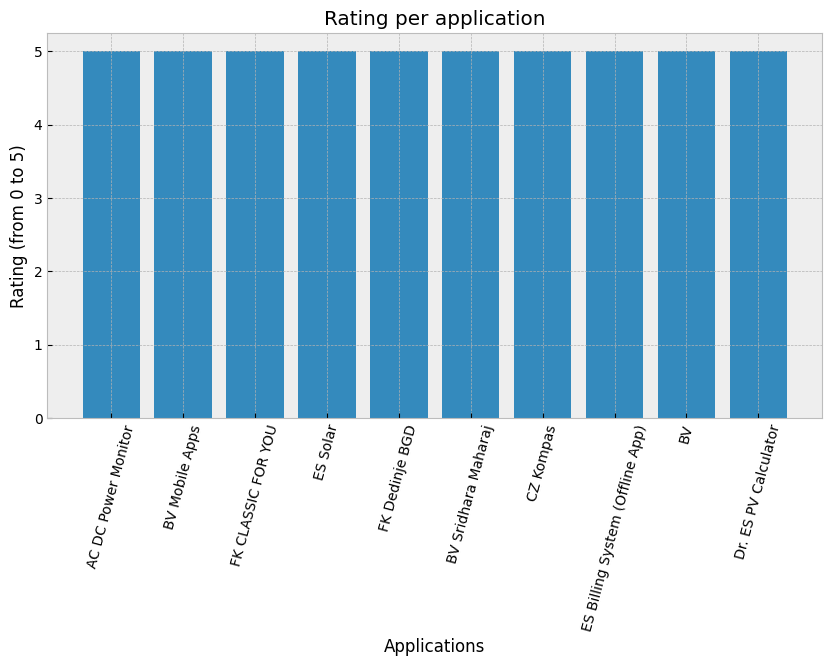

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
rating_mean = df_no_nulls_rating.mean()
ax.bar(df_no_nulls_rating.sort_values(by=['Rating'],ascending=False)['App'].head(10), df_no_nulls_rating.sort_values(by=['Rating'],ascending=False)['Rating'].head(10))
ax.set_title('Rating per application')
ax.set_ylabel('Rating (from 0 to 5)')
ax.set_xlabel('Applications')
plt.xticks(rotation=75)


Puede verse que hay muchas aplicaciones con 5 estrellas de rating. <br>
En este caso, el grafico rating por aplicacion no tendria sentido ya que son demasiadas aplicaciones para analizarlas individualmente de esta forma.

Procedemos a buscar uno que cuente cuantas aplicaciones existen por rating


In [29]:
df_no_nulls_rating.sort_values(by=['Rating'],ascending=False)[['App','Rating']].head(10)

,App,Rating
8287,AC DC Power Monitor,5.0
6851,BV Mobile Apps,5.0
10529,FK CLASSIC FOR YOU,5.0
9815,ES Solar,5.0
10564,FK Dedinje BGD,5.0
6861,BV Sridhara Maharaj,5.0
8159,CZ Kompas,5.0
9810,ES Billing System (Offline App),5.0
6852,BV,5.0
9806,Dr. ES PV Calculator,5.0


In [30]:
#df_no_nulls_rating.groupby(['Rating'])['App'].count()


In [31]:
df_counts_per_rating = df_no_nulls_rating.groupby("Rating").count()
df_counts_per_rating.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1,Genre2,New_Size,Multiplier
Rating,,,,,,,,,,,,,,,
1.0,16,16,16,16,16,16,16,16,16,16,16,16,0,16,16
1.2,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
1.4,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3
1.5,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3
1.6,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4


Text(0.5, 0, 'Rating')

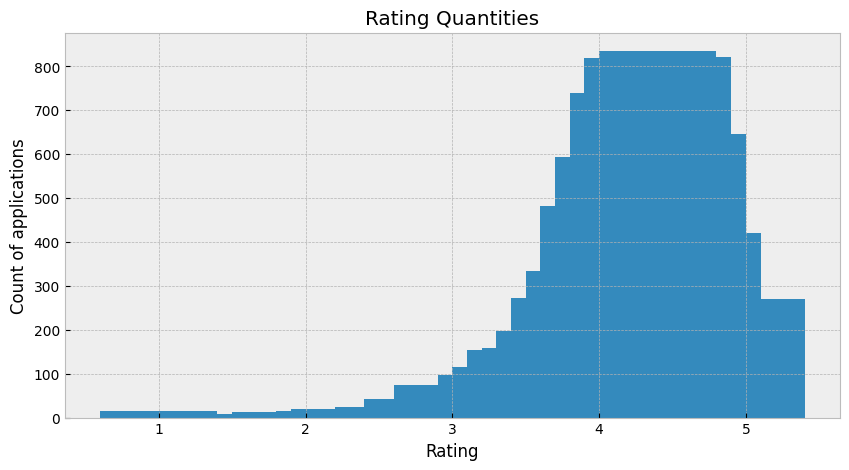

In [32]:

fig, ax = plt.subplots(figsize=(10,5))
x= df_counts_per_rating.index
y = df_counts_per_rating.App
#x = df_no_nulls_rating[df_no_nulls_rating['Rating'] <= 5]['Rating'].unique() # Filtramos ratings < 5 ya que se detectó que existe en el DF un rating = 19, que es inválido.
#y = df_no_nulls_rating[df_no_nulls_rating['Rating'] <= 5 ].groupby(['Rating'])['App'].count()
ax.bar(x, y)
ax.set_title('Rating Quantities')
ax.set_ylabel('Count of applications')
ax.set_xlabel('Rating')

Se puede concluir entonces que la mayoria de los valores de rating se encuentra entre 3.5 y 5

In [33]:
df_counts_per_rating['App'] \
      .reset_index() \
      .sort_values(['App'], ascending=False) \
      .head(15)

,Rating,App
32,4.4,835
33,4.5,822
31,4.3,818
30,4.2,740
34,4.6,646
29,4.1,594
28,4.0,481
35,4.7,421
27,3.9,333
26,3.8,272


Vemos de manera ordenada descendente los datos demostrando efectivamente que la mayor cantidad de aplicaciones con lo posee el rating 4.4 

Mismo grafico como Scatterplot

<AxesSubplot: xlabel='Rating', ylabel='App'>

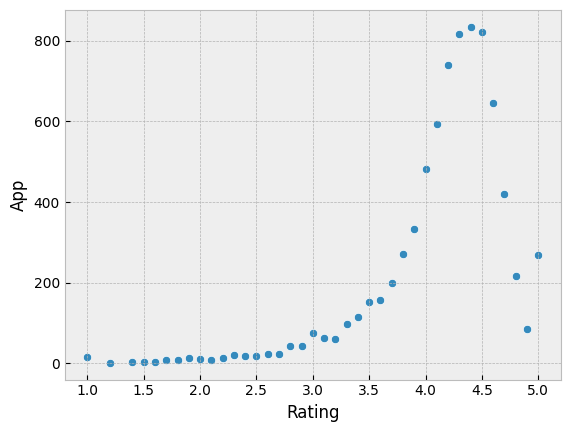

In [34]:
sns.scatterplot(data=df_counts_per_rating, x="Rating", y="App")

### Pregunta 2: ¿Que categoría posee la mayor cantidad de aplicaciones?

In [35]:
df_top_category = df_app.groupby('Category').count()
df_top_category.head(10)

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1,Genre2,New_Size,Multiplier
Category,,,,,,,,,,,,,,,
ART_AND_DESIGN,65,62,65,65,65,65,65,65,65,64,65,65,7,65,62
AUTO_AND_VEHICLES,85,73,85,85,85,85,85,85,85,85,85,85,0,85,75
BEAUTY,53,42,53,53,53,53,53,53,53,53,53,53,0,53,47
BOOKS_AND_REFERENCE,231,178,231,231,231,231,231,231,231,230,231,231,0,231,197
BUSINESS,460,303,460,460,460,460,460,460,460,460,460,460,0,460,400
COMICS,60,58,60,60,60,60,60,60,60,60,60,60,1,60,51
COMMUNICATION,387,328,387,387,387,387,387,387,387,387,387,387,0,387,265
DATING,234,195,234,234,234,234,234,234,234,234,234,234,0,234,212
EDUCATION,156,155,156,156,156,156,156,156,156,156,156,156,27,156,111


Text(0.5, 1.0, 'Cantidad de aplicaciones por categoria')

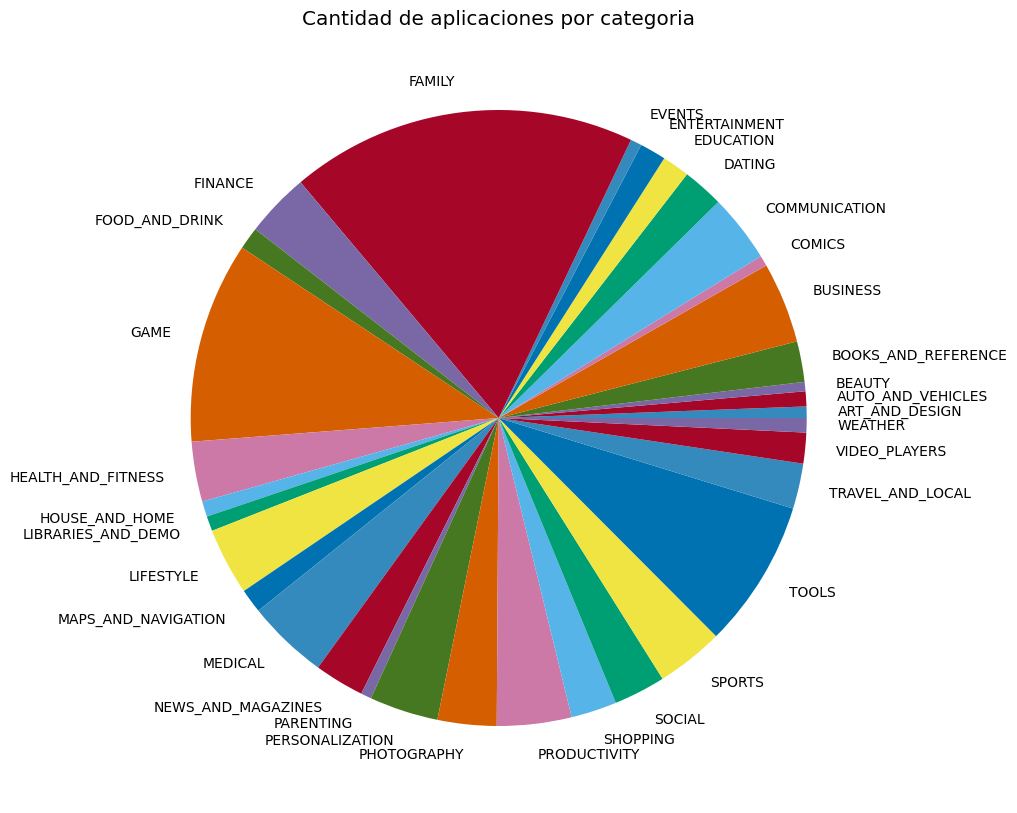

In [36]:
fig,ax = plt.subplots(figsize =(20, 10))
ax.pie(df_top_category.App, labels = df_top_category.index) #autopct='%1.1f%%' --> me muestra el porcentaje dentro
ax.set_title('Cantidad de aplicaciones por categoria')
# ax.legend(labels = df_app['Category'].unique(),
#           title="Ingredients",
#           loc="center left",
#           bbox_to_anchor=(1, 0, 0.5, 1))


En este caso, aplicar un PIE chart no seria correcto ya que vemos que hay muchas categorias y el grafico se torna complejo de leer. <br>
Procedemos a realizar un grafico de barras para que su lectura sea más sencilla.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FAMILY'),
  Text(12, 0, 'FINANCE'),
  Text(13, 0, 'FOOD_AND_DRINK'),
  Text(14, 0, 'GAME'),
  Text(15, 0, 'HEALTH_AND_FITNESS'),
  Text(16, 0, 'HOUSE_AND_HOME'),
  Text(17, 0, 'LIBRARIES_AND_DEMO'),
  Text(18, 0, 'LIFESTYLE'),
  Text(19, 0, 'MAPS_AND_NAVIGATION'),
  Text(20, 0, 'MEDICAL'),
  Text(21, 0, 'NEWS_AND_MAGAZINES'),
  Text(22, 0, 'PARENTING'),
  Text(23, 0, 'PERSONALIZATION'),
  Text(24, 0, 'PHOTOGRAPHY'),
  Text(25, 0, 'PRODUCTIVITY'),
  Text(26, 0, 'SHOPPING'),
  

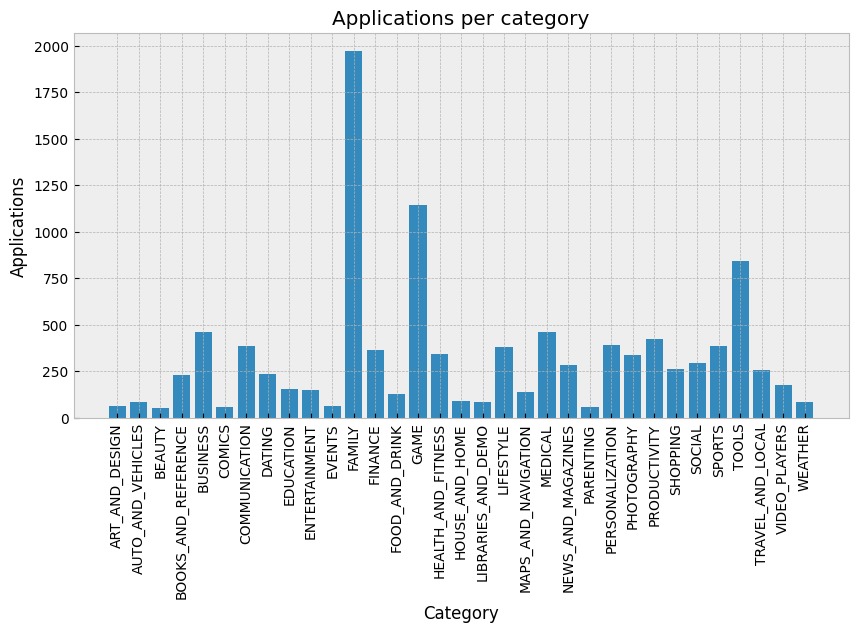

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(df_top_category.index,df_top_category.App)
ax.set_title('Applications per category')
ax.set_ylabel('Applications')
ax.set_xlabel('Category')

plt.xticks(rotation=90)

Asi vemos entonces que abundan las categorias de FAMILITY, GAMES y TOOLS. Podemos verlo en el siguiente Data Frame mas en detalle.

In [38]:
df_app.groupby('Category')['App'].count() \
      .reset_index() \
      .sort_values(['App'], ascending=False)

# Otra forma de hacerlo:
#df = df_app['Category'].value_counts(ascending=False).reset_index()
#df.head()

,Category,App
11,FAMILY,1972
14,GAME,1144
29,TOOLS,843
20,MEDICAL,463
4,BUSINESS,460
25,PRODUCTIVITY,424
23,PERSONALIZATION,392
6,COMMUNICATION,387
28,SPORTS,384
18,LIFESTYLE,382


### Pregunta 3: ¿Que categorias poseen la mayor cantidad de instalaciones?

In [39]:
df_top_installations = df_app.groupby('Category').sum()
df_top_installations.head(20)

C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\3883808329.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_top_installations = df_app.groupby('Category').sum()


,Rating,Reviews,Installs,Price
Category,,,,
ART_AND_DESIGN,270.2,1714440,124338100,5.97
AUTO_AND_VEHICLES,305.9,1163666,53130211,13.47
BEAUTY,179.7,396240,27197050,0.00
BOOKS_AND_REFERENCE,773.6,21959069,1921469576,119.77
BUSINESS,1248.8,13954552,1001914865,185.27
COMICS,241.0,3383276,56086150,0.00
COMMUNICATION,1364.0,815462260,32647276251,83.14
DATING,774.3,7291278,264310807,31.43
EDUCATION,680.3,39595786,871452000,17.96


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FAMILY'),
  Text(12, 0, 'FINANCE'),
  Text(13, 0, 'FOOD_AND_DRINK'),
  Text(14, 0, 'GAME'),
  Text(15, 0, 'HEALTH_AND_FITNESS'),
  Text(16, 0, 'HOUSE_AND_HOME'),
  Text(17, 0, 'LIBRARIES_AND_DEMO'),
  Text(18, 0, 'LIFESTYLE'),
  Text(19, 0, 'MAPS_AND_NAVIGATION'),
  Text(20, 0, 'MEDICAL'),
  Text(21, 0, 'NEWS_AND_MAGAZINES'),
  Text(22, 0, 'PARENTING'),
  Text(23, 0, 'PERSONALIZATION'),
  Text(24, 0, 'PHOTOGRAPHY'),
  Text(25, 0, 'PRODUCTIVITY'),
  Text(26, 0, 'SHOPPING'),
  

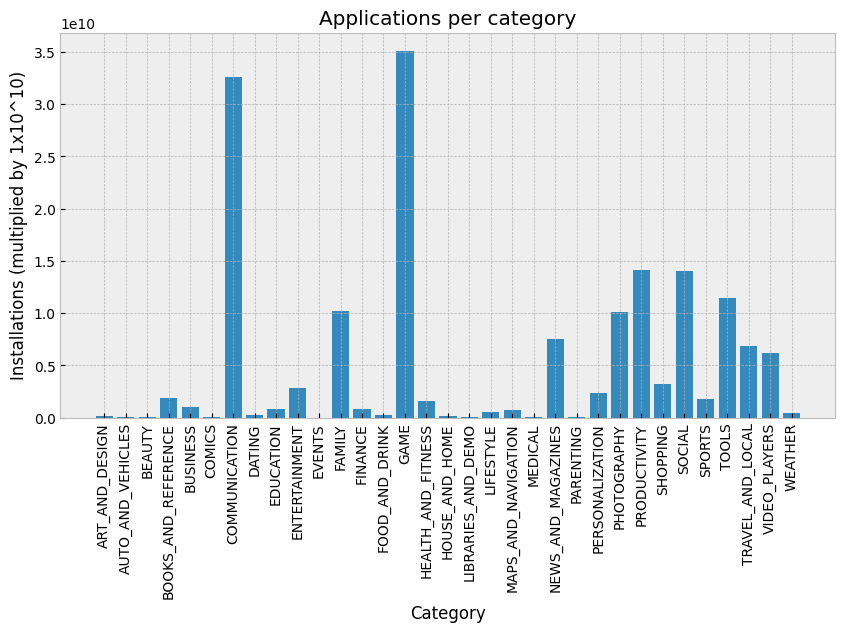

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(df_top_installations.index,df_top_installations.Installs)
ax.set_title('Applications per category')
ax.set_ylabel('Installations (multiplied by 1x10^10)')
ax.set_xlabel('Category')

plt.xticks(rotation=90)

Podemos concluir entonces que, las aplicaciones mas instaladas son relacionadas a Juegos y Comunicaciones.

In [41]:
df_app.groupby('Category')['Installs'].sum() \
      .reset_index() \
      .sort_values(['Installs'], ascending=False) \
      .head(5)

,Category,Installs
14,GAME,35086024415
6,COMMUNICATION,32647276251
25,PRODUCTIVITY,14176091369
27,SOCIAL,14069867902
29,TOOLS,11452771915


### Pregunta 4: ¿Que tipo de aplicaciones son las mas comunes (Pagas o Gratis)?


<Figure size 640x480 with 0 Axes>

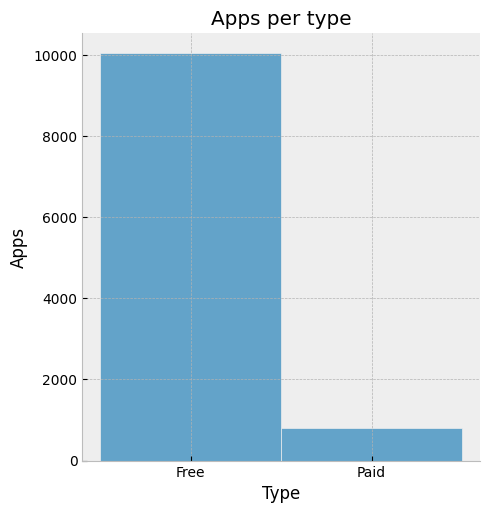

In [42]:
plt.figure()
ax = sns.displot(data=df_app, x="Type", multiple="stack")

ax.set(xlabel='Type', ylabel='Apps', title='Apps per type')


Vemos entonces que las aplicaciones Gratis predominan por sobre las pagas

In [43]:
df_app.groupby('Type')['App'].count() \
      .reset_index() \
      .sort_values(['App'], ascending=False) \
      .head(5)

,Type,App
0,Free,10039
1,Paid,800


### Pregunta 5: ¿Cuál es el porcentaje de instalaciones por tipo?

Procedemos a realizar un Pie Chart para mostrar la diferencia en porcentajes

In [44]:

df_no_nulls_type = df_app.dropna(subset=['Type'])
df_top_type = df_app.groupby('Type').count()

df_top_type

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1,Genre2,New_Size,Multiplier
Type,,,,,,,,,,,,,,,
Free,10039,10039,8719,10039,10039,10039,10039,10039,10039,10033,10038,10039,420,10039,8421
Paid,800,800,647,800,800,800,800,800,800,798,799,800,78,800,724


Text(0.5, 1.0, 'Porcentaje de aplicaciones por categoria')

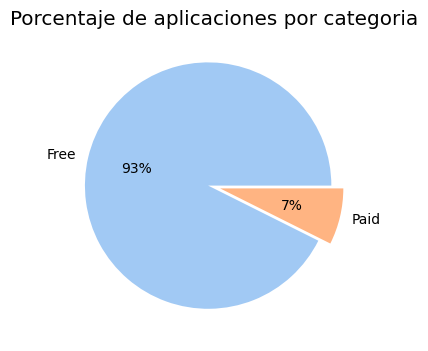

In [45]:
colors = sns.color_palette('pastel')[0:5]

fig,ax = plt.subplots(figsize =(4, 4))
ax.pie(df_top_type.App, labels = df_top_type.index, colors = colors, autopct='%.0f%%', explode = [0.05] *2) #autopct='%1.1f%%' --> me muestra el porcentaje dentro
ax.set_title('Porcentaje de aplicaciones por categoria')

Entonces, tan solo un 7% del total de aplicaciones son pagas.

In [46]:
df_app.groupby('Type')['App'].count() \
      .reset_index() \
      .sort_values(['App'], ascending=False) \
      .head(5)

,Type,App
0,Free,10039
1,Paid,800


In [47]:
df_app_per = (df_app.groupby('Type')['App'].count()) / (df_app.count()['App'])*100

df_app_per.head()

Type
Free    92.610701
Paid     7.380074
Name: App, dtype: float64

### Pregunta 6: ¿Cantidad de instalaciones por tipo (Pagas o Gratis)?

[Text(0.5, 0, 'Type'),
 Text(0, 0.5, 'Apps'),
 Text(0.5, 1.0, 'Installations per type')]

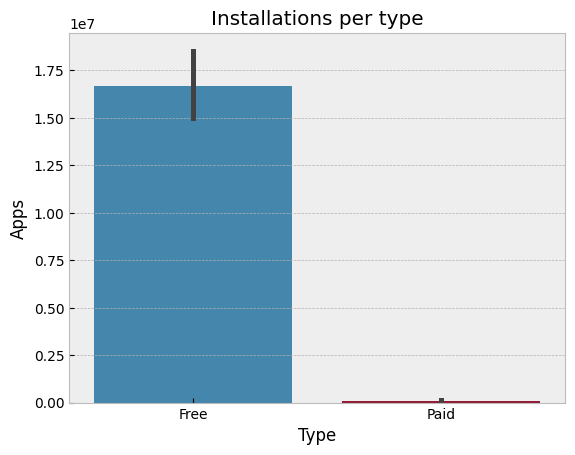

In [48]:
#define Seaborn color palette to use
#colors = sns.color_palette('pastel')[0:5]

plt.figure()
ax = sns.barplot(data=df_no_nulls_type, x= 'Type', y="Installs")#, hue= 'Type')#,multiple="stack")

ax.set(xlabel='Type', ylabel='Apps', title='Installations per type')



Podemos ver entonces que se realizan muchas mas instalaciones de aplicaciones gratis que de las pagas

In [49]:
df_app.groupby('Type')['Installs'].sum() \
      .reset_index() \
      .sort_values(['Installs'], ascending=False) \
      .head(5)

,Type,Installs
0,Free,167560477406
1,Paid,72956081


Entrega 3

In [50]:
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1,Genre2,New_Size,Multiplier
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19x1000000,10000,Free,0.0,Everyone,2018-01-07,1.0.0,4.0.3 and up,Art & Design,None,19,1000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14x1000000,500000,Free,0.0,Everyone,2018-01-15,2.0.0,4.0.3 and up,Art & Design,Pretend Play,14,1000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7x1000000,5000000,Free,0.0,Everyone,2018-08-01,1.2.4,4.0.3 and up,Art & Design,None,8.7,1000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25x1000000,50000000,Free,0.0,Teen,2018-06-08,Varies with device,4.2 and up,Art & Design,None,25,1000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8x1000000,100000,Free,0.0,Everyone,2018-06-20,1.1,4.4 and up,Art & Design,Creativity,2.8,1000000


In [51]:
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Pregunta 7: ¿Las mejores aplicaciones rankeadas son las gratis?

In [52]:
df_counts_per_Type = df_no_nulls_rating.groupby("Type").mean()
df_counts_per_Type.head()

C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\814215504.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_counts_per_Type = df_no_nulls_rating.groupby("Type").mean()


,Rating,Reviews,Size,Installs,Price,New_Size,Multiplier
Type,,,,,,,
Free,4.167469,317966.653007,2.314678e+07,9.092723e+06,0.000000,35.993566,971077.902098
Paid,4.252677,7016.537133,2.062158e+07,8.236594e+04,15.052383,53.226252,912005.181347


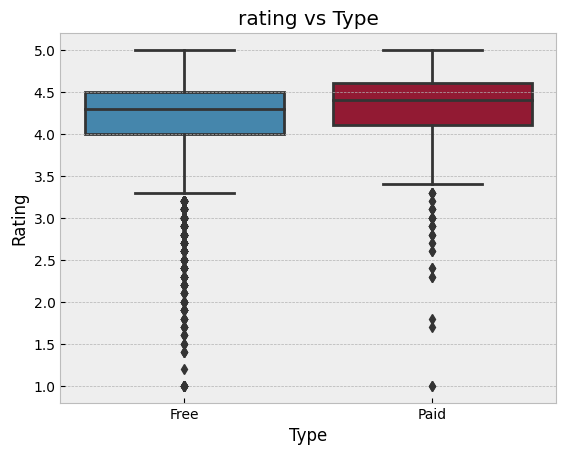

In [53]:
sns.boxplot(x='Type', y = 'Rating', data = df_no_nulls_rating) 
#Data.boxplot(grid= False, column = ['pay'], by = ['gender'])
plt.title("rating vs Type");

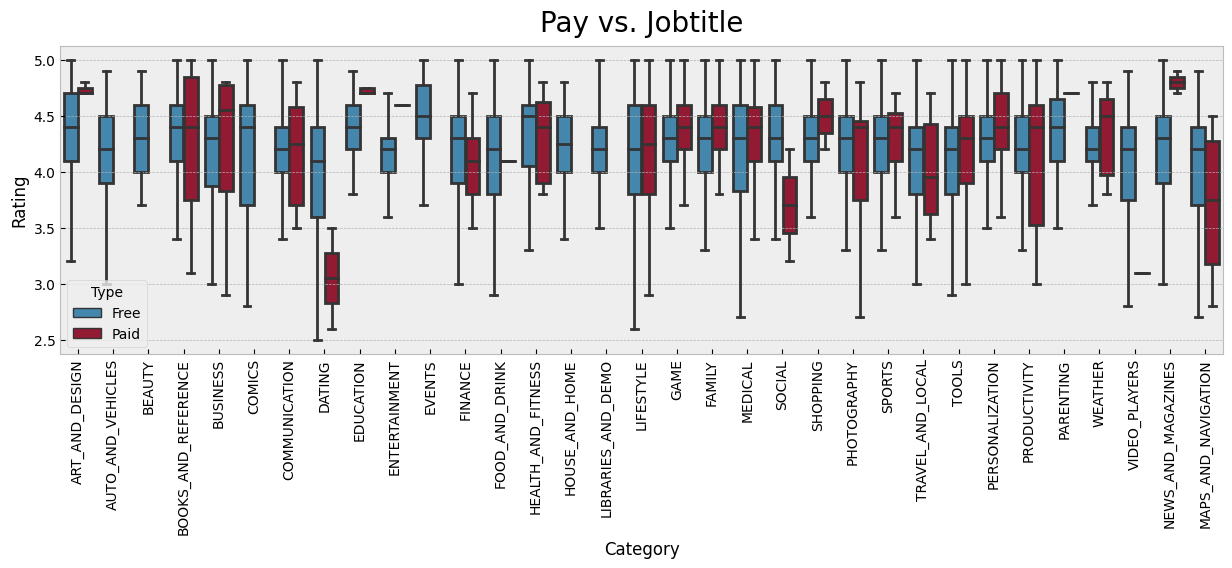

In [54]:
# Rating por categoria, diferenciado por tipo

fig,ax = plt.subplots(figsize =(15, 4))
sns.boxplot(x='Category', y = 'Rating', hue = 'Type',data = df_no_nulls_rating,showfliers=False) 
plt.title("Pay vs. Jobtitle", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);


(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 [Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0'),
  Text(5.5, 0, '5.5')])

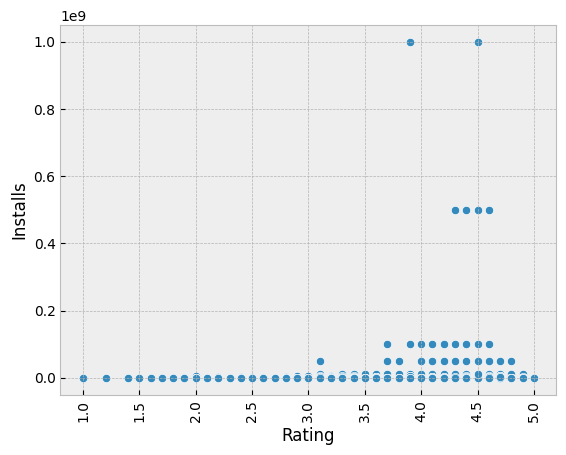

In [55]:
sns.scatterplot(data=df_no_nulls_rating, x="Rating", y="Installs")
plt.xticks(rotation=90)

In [56]:
model1 = 'Rating~Type'
lm1   = sm.ols(formula = model1, data = df_no_nulls_rating).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     13.13
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           0.000292
Time:                        11:21:53   Log-Likelihood:                -6262.4
No. Observations:                7729   AIC:                         1.253e+04
Df Residuals:                    7727   BIC:                         1.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.1675      0.006    647.617   

Podemos observar entonces que no existe una relacion lineal entre el rating y el tipo de aplicacion. Si bien vemos que las aplicaciones pagas suelen tener mejor rating que las gratis, aumentando el raing en 0.0804, el R-squared es muy cercano a 0, denotando la debil relacion entre las variables Tipo y ranking. 
Además, existe una mayor cantidad de instalaciones de aplicaciones gratis en comparacion con aplicaciones pagas, como puede verse en gráfico a continuación:

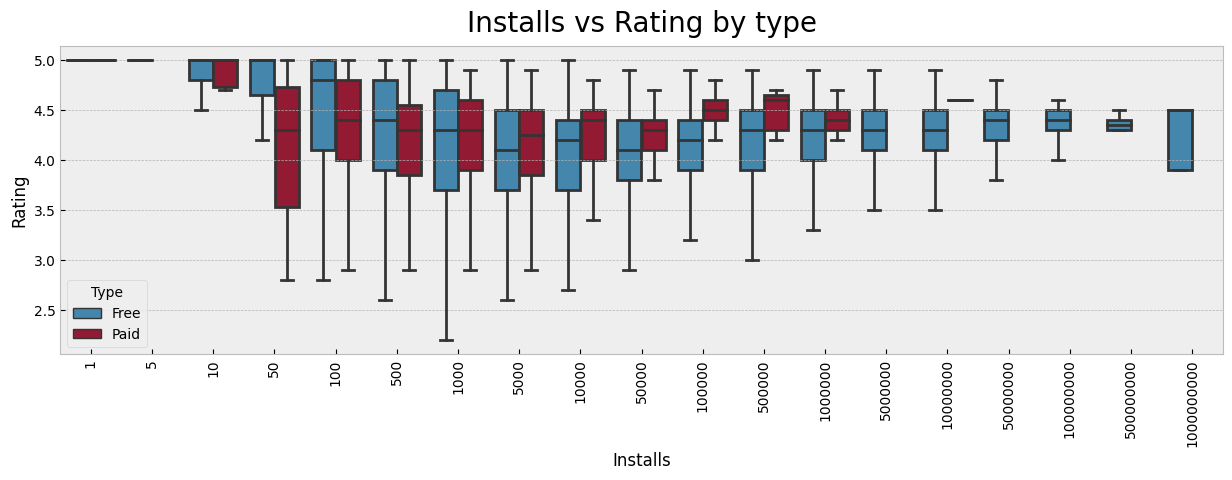

In [57]:
# Rating por categoria, diferenciado por tipo

fig,ax = plt.subplots(figsize =(15, 4))
sns.boxplot(x='Installs', y = 'Rating', hue = 'Type',data = df_no_nulls_rating,showfliers=False) 
plt.title("Installs vs Rating by type", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);


### Pregunta 8: ¿La version de android afecta en la instalacion de las aplicaciones?

Procedemos a agrupar el dataframe por version de android para asi verificar si existe algun indicio a simple vista de incremento de instalaciones en base a la version de android utilizada

In [58]:
df_no_nulls_android_ver = df_no_nulls_rating.rename(columns = {'Android Ver':'android_ver'})
df_counts_per_android_version = df_no_nulls_android_ver.groupby("android_ver").sum()
df_counts_per_android_version.head(5)

C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\2808648252.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_counts_per_android_version = df_no_nulls_android_ver.groupby("android_ver").sum()


,Rating,Reviews,Size,Installs,Price,New_Size,Multiplier
android_ver,,,,,,,
1.0 and up,8.1,529,7711000.0,60000,0.00,817.9,1001000
1.5 and up,60.3,193141,93416000.0,13840600,13.94,908.6,8007000
1.6 and up,355.6,629928,188618000.0,46394110,475.32,19687.1,35052000
2.0 and up,118.0,1338404,189999000.0,35491800,6.95,3186.0,20007000
2.0.1 and up,30.3,1108901,155555000.0,101070060,13.45,809.9,6001000


In [59]:
df_counts_per_android_version \
      .reset_index() \
      .sort_values(['Installs'], ascending=False) \
      .head(50)

,android_ver,Rating,Reviews,Size,Installs,Price,New_Size,Multiplier
16,4.1 and up,8198.8,1149763689,5.379073e+10,27120915760,1654.38,57113.4,1922008000
12,4.0 and up,4621.0,351946574,2.045852e+10,13484529115,1279.75,34361.6,1082027000
19,4.4 and up,3340.9,149634991,2.185706e+10,7823175670,1356.64,24315.6,803003000
14,4.0.3 and up,5054.8,334230238,2.836354e+10,6469813841,1281.91,34098.8,1180014000
30,Varies with device,240.6,19659163,1.184014e+09,2200563200,13.98,1198.0,55001000
7,2.3 and up,2321.6,69943591,1.249128e+10,1723609962,228.24,17661.1,550016000
23,5.0 and up,2036.7,32312514,1.278203e+10,1661449175,173.23,14313.5,488002000
17,4.2 and up,1321.8,62888444,7.375817e+09,1504527300,850.76,11089.1,309009000
8,2.3.3 and up,952.4,21521072,4.829945e+09,868669430,106.73,9570.2,226009000
9,3.0 and up,870.4,38566651,3.224889e+09,571684000,166.61,9108.0,200011000


Puede observarse que no existe una clara tendencia en el incremento de las instalaciones dependiendo de la version, ya que versiones mas antiguas como la 4.0 tiene la mayor cantidad de instalaciones. <br>

Procedemos a realizar un grafico de dispersion para evaluar como se disponen los puntos y ver si podemos encontrar un patron en dichos puntos.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, '4.0.3 and up'),
  Text(1, 0, '4.2 and up'),
  Text(2, 0, '4.4 and up'),
  Text(3, 0, '2.3 and up'),
  Text(4, 0, '3.0 and up'),
  Text(5, 0, '4.1 and up'),
  Text(6, 0, '4.0 and up'),
  Text(7, 0, '2.3.3 and up'),
  Text(8, 0, 'Varies with device'),
  Text(9, 0, '2.2 and up'),
  Text(10, 0, '5.0 and up'),
  Text(11, 0, '6.0 and up'),
  Text(12, 0, '1.6 and up'),
  Text(13, 0, '1.5 and up'),
  Text(14, 0, '2.1 and up'),
  Text(15, 0, '7.0 and up'),
  Text(16, 0, '5.1 and up'),
  Text(17, 0, '4.3 and up'),
  Text(18, 0, '4.0.3 - 7.1.1'),
  Text(19, 0, '2.0 and up'),
  Text(20, 0, '3.2 and up'),
  Text(21, 0, '4.4W and up'),
  Text(22, 0, '7.1 and up'),
  Text(23, 0, '7.0 - 7.1.1'),
  Text(24, 0, '8.0 and up'),
  Text(25, 0, '5.0 - 8.0'),
  Text(26, 0, '3.1 and up'),
  Text(27, 0, '2.0.1 a

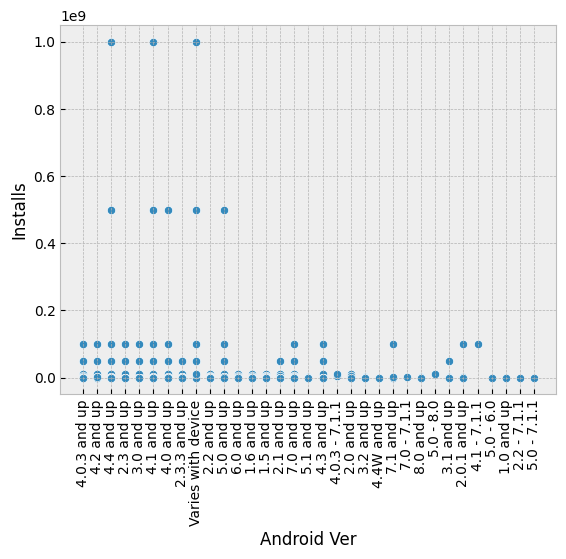

In [60]:
sns.scatterplot(data=df_app, x="Android Ver", y="Installs")
plt.xticks(rotation=90)

Vemos entonces que el patron tenderia a ser una linea horizontal, por lo que no podria analizarse una relacion entre las variables de "Installs" y "Android Ver".

### API 3: https://data.42matters.com/api/meta/android/apps/app_categories.json (Publica)

Establezco la URL y guardo el resultado en result.

In [61]:
url = "https://data.42matters.com/api/meta/android/apps/app_categories.json"
result = requests.get(url)
res = result.text

Cargo el resultado del JSON en una variable.

In [62]:
api_json_data = json.loads(result.text)

Normalizo la data con un max_level = 1, ya que el JSON tenia otro JSON anidado dentro, por lo que necesitaba des-anidarlos.

In [63]:
from pandas import json_normalize
df_normalized = json_normalize(api_json_data,record_path='categories',max_level=1)
df_normalized

,cat_key,name
0,APPLICATION,All apps
1,GAME,All games
2,ART_AND_DESIGN,Art & Design
3,AUTO_AND_VEHICLES,Auto & Vehicles
4,BEAUTY,Beauty
5,BOOKS_AND_REFERENCE,Books & Reference
6,BUSINESS,Business
7,COMICS,Comics
8,COMMUNICATION,Communication
9,DATING,Dating


In [64]:
# Renombro la columna cat_key por category
df_normalized = df_normalized.rename(columns={"cat_key": "Category"})

### Feature Engineering

Procedemos a realizar Feature Engineering para entender que variables nos conviene quedarnos para entrenar nuestro modelo.

In [65]:
df_no_nulls_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1,Genre2,New_Size,Multiplier
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,2018-01-07,1.0.0,4.0.3 and up,Art & Design,None,19.0,1000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,2018-01-15,2.0.0,4.0.3 and up,Art & Design,Pretend Play,14.0,1000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,2018-08-01,1.2.4,4.0.3 and up,Art & Design,None,8.7,1000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,2018-06-08,Varies with device,4.2 and up,Art & Design,None,25.0,1000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,2018-06-20,1.1,4.4 and up,Art & Design,Creativity,2.8,1000000


In [66]:
# Eliminamos variables que fueron usadas para limpiar el data set
df_no_nulls_rating = df_no_nulls_rating.drop(columns=['New_Size','Multiplier','Current Ver','Last Updated'])

In [67]:
df_no_nulls_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,Genre1,Genre2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,4.0.3 and up,Art & Design,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,4.0.3 and up,Art & Design,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,4.2 and up,Art & Design,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,4.4 and up,Art & Design,Creativity


In [153]:
# Dropeamos la columna App ya que no nos sirve de nada para analizar nuestro modelo, es un identificador único
df_no_nulls_rating_no_apps = df_no_nulls_rating.drop(columns=['App'])

### Verificación de categorias obtenidas mediante la API

In [162]:
df_no_nulls_rating_no_apps.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,Genre1,Genre2
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,4.0.3 and up,Art & Design,None
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,4.0.3 and up,Art & Design,Pretend Play
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,4.0.3 and up,Art & Design,None
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,4.2 and up,Art & Design,None
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,4.4 and up,Art & Design,Creativity


In [155]:
df_no_nulls_rating_no_apps.shape

(7729, 11)

Realizo un merge inner, para verificar que la informacion correspondiente a la API concuerda con las categorias obtenidas en el data set.

In [156]:
df_merge = pd.merge(df_no_nulls_rating_no_apps,df_normalized, on ='Category',how= 'inner')

In [157]:
df_merge.shape[0]-df_no_nulls_rating_no_apps.shape[0]

0

Efectivamente la data de la API y del data set son consistentes entre si. no se pierde información.

### With One Hot Encoding

Realizamos el analisis primero utilizando one-hot encoding, convirtiendo toda variable cualitiativa a cuantitativa como columna

In [158]:
df_no_nulls_rating_no_apps.describe()

,Rating,Reviews,Size,Installs,Price
count,7729.000000,7.729000e+03,7.729000e+03,7.729000e+03,7729.000000
mean,4.173852,2.946726e+05,2.295761e+07,8.417734e+06,1.127614
std,0.544563,1.863227e+06,2.344549e+07,5.013846e+07,17.401297
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,1.080000e+02,5.300000e+06,1.000000e+04,0.000000
50%,4.300000,2.328000e+03,1.400000e+07,1.000000e+05,0.000000
75%,4.500000,3.896100e+04,3.300000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


In [165]:
df_no_nulls_rating_dummies = pd.get_dummies(df_no_nulls_rating_no_apps)

list_big_variables = ['Reviews','Size','Installs']

df_no_nulls_rating_dummies[list_big_variables] = df_no_nulls_rating_dummies[list_big_variables]/1000 #Estandarizar variables numéricas. Divido las mayores por 1000 para que el modelo no tenga problemas de ajuste.

In [166]:
# df_no_nulls_rating_dummies = pd.get_dummies(df_no_nulls_rating_no_apps)

# list_numeric_variables = ['Rating','Reviews','Size','Installs','Price']

# df_no_nulls_rating_dummies[list_numeric_variables] = (df_no_nulls_rating_dummies[list_numeric_variables] - df_no_nulls_rating_dummies[list_numeric_variables].mean())/df_no_nulls_rating_dummies[list_numeric_variables].std() #Estandarizar variables numéricas

In [168]:
df_no_nulls_rating_dummies.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Android Ver_1.0 and up,Android Ver_1.5 and up,Android Ver_1.6 and up,Android Ver_2.0 and up,Android Ver_2.0.1 and up,Android Ver_2.1 and up,Android Ver_2.2 and up,Android Ver_2.3 and up,Android Ver_2.3.3 and up,Android Ver_3.0 and up,Android Ver_3.1 and up,Android Ver_3.2 and up,Android Ver_4.0 and up,Android Ver_4.0.3 - 7.1.1,Android Ver_4.0.3 and up,Android Ver_4.1 - 7.1.1,Android Ver_4.1 and up,Android Ver_4.2 and up,Android Ver_4.3 and up,Android Ver_4.4 and up,Android Ver_4.4W and up,Android Ver_5.0 - 6.0,Android Ver_5.0 - 8.0,Android Ver_5.0 and up,Android Ver_5.1 and up,Android Ver_6.0 and up,Android Ver_7.0 - 7.1.1,Android Ver_7.0 and up,Android Ver_7.1 and up,Android Ver_8.0 and up,Android Ver_Varies with device,Genre1_Action,Genre1_Adventure,Genre1_Arcade,Genre1_Art & Design,Genre1_Auto & Vehicles,Genre1_Beauty,Genre1_Board,Genre1_Books & Reference,Genre1_Business,Genre1_Card,Genre1_Casino,Genre1_Casual,Genre1_Comics,Genre1_Communication,Genre1_Dating,Genre1_Education,Genre1_Educational,Genre1_Entertainment,Genre1_Events,Genre1_Finance,Genre1_Food & Drink,Genre1_Health & Fitness,Genre1_House & Home,Genre1_Libraries & Demo,Genre1_Lifestyle,Genre1_Maps & Navigation,Genre1_Medical,Genre1_Music,Genre1_Music & Audio,Genre1_News & Magazines,Genre1_Parenting,Genre1_Personalization,Genre1_Photography,Genre1_Productivity,Genre1_Puzzle,Genre1_Racing,Genre1_Role Playing,Genre1_Shopping,Genre1_Simulation,Genre1_Social,Genre1_Sports,Genre1_Strategy,Genre1_Tools,Genre1_Travel & Local,Genre1_Trivia,Genre1_Video Players & Editors,Genre1_Weather,Genre1_Word,Genre2_Action & Adventure,Genre2_Brain Games,Genre2_Creativity,Genre2_Education,Genre2_Music & Video,Genre2_Pretend Play
0,4.1,0.159,19000.0,10.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,0.967,14000.0,500.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4.7,87.510,8700.0,5000.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215.644,25000.0,50000.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,0.967,2800.0,100.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [169]:
# Realizamos reemplazo de simbolos en las columnas ya que son incompatibles
df_no_nulls_rating_dummies.columns = [c.replace(' ', '_') for c in df_no_nulls_rating_dummies.columns]
df_no_nulls_rating_dummies.columns = [c.replace('&', 'and') for c in df_no_nulls_rating_dummies.columns]
df_no_nulls_rating_dummies.columns = [c.replace('.', '_') for c in df_no_nulls_rating_dummies.columns]
df_no_nulls_rating_dummies.columns = [c.replace('-', '_') for c in df_no_nulls_rating_dummies.columns]

In [170]:
df_no_nulls_rating_dummies.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content_Rating_Adults_only_18+,Content_Rating_Everyone,Content_Rating_Everyone_10+,Content_Rating_Mature_17+,Content_Rating_Teen,Content_Rating_Unrated,Android_Ver_1_0_and_up,Android_Ver_1_5_and_up,Android_Ver_1_6_and_up,Android_Ver_2_0_and_up,Android_Ver_2_0_1_and_up,Android_Ver_2_1_and_up,Android_Ver_2_2_and_up,Android_Ver_2_3_and_up,Android_Ver_2_3_3_and_up,Android_Ver_3_0_and_up,Android_Ver_3_1_and_up,Android_Ver_3_2_and_up,Android_Ver_4_0_and_up,Android_Ver_4_0_3___7_1_1,Android_Ver_4_0_3_and_up,Android_Ver_4_1___7_1_1,Android_Ver_4_1_and_up,Android_Ver_4_2_and_up,Android_Ver_4_3_and_up,Android_Ver_4_4_and_up,Android_Ver_4_4W_and_up,Android_Ver_5_0___6_0,Android_Ver_5_0___8_0,Android_Ver_5_0_and_up,Android_Ver_5_1_and_up,Android_Ver_6_0_and_up,Android_Ver_7_0___7_1_1,Android_Ver_7_0_and_up,Android_Ver_7_1_and_up,Android_Ver_8_0_and_up,Android_Ver_Varies_with_device,Genre1_Action,Genre1_Adventure,Genre1_Arcade,Genre1_Art_and_Design,Genre1_Auto_and_Vehicles,Genre1_Beauty,Genre1_Board,Genre1_Books_and_Reference,Genre1_Business,Genre1_Card,Genre1_Casino,Genre1_Casual,Genre1_Comics,Genre1_Communication,Genre1_Dating,Genre1_Education,Genre1_Educational,Genre1_Entertainment,Genre1_Events,Genre1_Finance,Genre1_Food_and_Drink,Genre1_Health_and_Fitness,Genre1_House_and_Home,Genre1_Libraries_and_Demo,Genre1_Lifestyle,Genre1_Maps_and_Navigation,Genre1_Medical,Genre1_Music,Genre1_Music_and_Audio,Genre1_News_and_Magazines,Genre1_Parenting,Genre1_Personalization,Genre1_Photography,Genre1_Productivity,Genre1_Puzzle,Genre1_Racing,Genre1_Role_Playing,Genre1_Shopping,Genre1_Simulation,Genre1_Social,Genre1_Sports,Genre1_Strategy,Genre1_Tools,Genre1_Travel_and_Local,Genre1_Trivia,Genre1_Video_Players_and_Editors,Genre1_Weather,Genre1_Word,Genre2_Action_and_Adventure,Genre2_Brain_Games,Genre2_Creativity,Genre2_Education,Genre2_Music_and_Video,Genre2_Pretend_Play
0,4.1,0.159,19000.0,10.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,0.967,14000.0,500.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4.7,87.510,8700.0,5000.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215.644,25000.0,50000.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,0.967,2800.0,100.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [171]:
# Separamos nuestro data set en variables dependientes (y) y variables independientes (X)
X = df_no_nulls_rating_dummies.drop("Installs",1)       # feature matrix
y = df_no_nulls_rating_dummies['Installs']               # target feature
df_no_nulls_rating_dummies.head()

C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\3326761368.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_no_nulls_rating_dummies.drop("Installs",1)       # feature matrix


,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content_Rating_Adults_only_18+,Content_Rating_Everyone,Content_Rating_Everyone_10+,Content_Rating_Mature_17+,Content_Rating_Teen,Content_Rating_Unrated,Android_Ver_1_0_and_up,Android_Ver_1_5_and_up,Android_Ver_1_6_and_up,Android_Ver_2_0_and_up,Android_Ver_2_0_1_and_up,Android_Ver_2_1_and_up,Android_Ver_2_2_and_up,Android_Ver_2_3_and_up,Android_Ver_2_3_3_and_up,Android_Ver_3_0_and_up,Android_Ver_3_1_and_up,Android_Ver_3_2_and_up,Android_Ver_4_0_and_up,Android_Ver_4_0_3___7_1_1,Android_Ver_4_0_3_and_up,Android_Ver_4_1___7_1_1,Android_Ver_4_1_and_up,Android_Ver_4_2_and_up,Android_Ver_4_3_and_up,Android_Ver_4_4_and_up,Android_Ver_4_4W_and_up,Android_Ver_5_0___6_0,Android_Ver_5_0___8_0,Android_Ver_5_0_and_up,Android_Ver_5_1_and_up,Android_Ver_6_0_and_up,Android_Ver_7_0___7_1_1,Android_Ver_7_0_and_up,Android_Ver_7_1_and_up,Android_Ver_8_0_and_up,Android_Ver_Varies_with_device,Genre1_Action,Genre1_Adventure,Genre1_Arcade,Genre1_Art_and_Design,Genre1_Auto_and_Vehicles,Genre1_Beauty,Genre1_Board,Genre1_Books_and_Reference,Genre1_Business,Genre1_Card,Genre1_Casino,Genre1_Casual,Genre1_Comics,Genre1_Communication,Genre1_Dating,Genre1_Education,Genre1_Educational,Genre1_Entertainment,Genre1_Events,Genre1_Finance,Genre1_Food_and_Drink,Genre1_Health_and_Fitness,Genre1_House_and_Home,Genre1_Libraries_and_Demo,Genre1_Lifestyle,Genre1_Maps_and_Navigation,Genre1_Medical,Genre1_Music,Genre1_Music_and_Audio,Genre1_News_and_Magazines,Genre1_Parenting,Genre1_Personalization,Genre1_Photography,Genre1_Productivity,Genre1_Puzzle,Genre1_Racing,Genre1_Role_Playing,Genre1_Shopping,Genre1_Simulation,Genre1_Social,Genre1_Sports,Genre1_Strategy,Genre1_Tools,Genre1_Travel_and_Local,Genre1_Trivia,Genre1_Video_Players_and_Editors,Genre1_Weather,Genre1_Word,Genre2_Action_and_Adventure,Genre2_Brain_Games,Genre2_Creativity,Genre2_Education,Genre2_Music_and_Video,Genre2_Pretend_Play
0,4.1,0.159,19000.0,10.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,0.967,14000.0,500.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4.7,87.510,8700.0,5000.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215.644,25000.0,50000.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,0.967,2800.0,100.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [172]:
X

,Rating,Reviews,Size,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content_Rating_Adults_only_18+,Content_Rating_Everyone,Content_Rating_Everyone_10+,Content_Rating_Mature_17+,Content_Rating_Teen,Content_Rating_Unrated,Android_Ver_1_0_and_up,Android_Ver_1_5_and_up,Android_Ver_1_6_and_up,Android_Ver_2_0_and_up,Android_Ver_2_0_1_and_up,Android_Ver_2_1_and_up,Android_Ver_2_2_and_up,Android_Ver_2_3_and_up,Android_Ver_2_3_3_and_up,Android_Ver_3_0_and_up,Android_Ver_3_1_and_up,Android_Ver_3_2_and_up,Android_Ver_4_0_and_up,Android_Ver_4_0_3___7_1_1,Android_Ver_4_0_3_and_up,Android_Ver_4_1___7_1_1,Android_Ver_4_1_and_up,Android_Ver_4_2_and_up,Android_Ver_4_3_and_up,Android_Ver_4_4_and_up,Android_Ver_4_4W_and_up,Android_Ver_5_0___6_0,Android_Ver_5_0___8_0,Android_Ver_5_0_and_up,Android_Ver_5_1_and_up,Android_Ver_6_0_and_up,Android_Ver_7_0___7_1_1,Android_Ver_7_0_and_up,Android_Ver_7_1_and_up,Android_Ver_8_0_and_up,Android_Ver_Varies_with_device,Genre1_Action,Genre1_Adventure,Genre1_Arcade,Genre1_Art_and_Design,Genre1_Auto_and_Vehicles,Genre1_Beauty,Genre1_Board,Genre1_Books_and_Reference,Genre1_Business,Genre1_Card,Genre1_Casino,Genre1_Casual,Genre1_Comics,Genre1_Communication,Genre1_Dating,Genre1_Education,Genre1_Educational,Genre1_Entertainment,Genre1_Events,Genre1_Finance,Genre1_Food_and_Drink,Genre1_Health_and_Fitness,Genre1_House_and_Home,Genre1_Libraries_and_Demo,Genre1_Lifestyle,Genre1_Maps_and_Navigation,Genre1_Medical,Genre1_Music,Genre1_Music_and_Audio,Genre1_News_and_Magazines,Genre1_Parenting,Genre1_Personalization,Genre1_Photography,Genre1_Productivity,Genre1_Puzzle,Genre1_Racing,Genre1_Role_Playing,Genre1_Shopping,Genre1_Simulation,Genre1_Social,Genre1_Sports,Genre1_Strategy,Genre1_Tools,Genre1_Travel_and_Local,Genre1_Trivia,Genre1_Video_Players_and_Editors,Genre1_Weather,Genre1_Word,Genre2_Action_and_Adventure,Genre2_Brain_Games,Genre2_Creativity,Genre2_Education,Genre2_Music_and_Video,Genre2_Pretend_Play
0,4.1,0.159,19000.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,0.967,14000.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4.7,87.510,8700.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215.644,25000.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,0.967,2800.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,.

In [173]:
y

0           10.0
1          500.0
2         5000.0
3        50000.0
4          100.0
          ...   
10833        1.0
10834        0.5
10836        5.0
10837        0.1
10840    10000.0
Name: Installs, Length: 7729, dtype: float64

#### Forward Selection

In [174]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.05):
    """
    params
      -data: Pandas DataFrame con las características
      -target: Pandas Series con la variable target
      -significance_level: Nivel de significancia para evaluar los coeficientes de las caracteríticas.
    return
      -best_features: lista con las características seleccionadas como mejores
    """
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target.astype(float), sm.add_constant(data[best_features+[new_column]].astype(float))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [175]:
forward_best_features = forward_selection(X,y)
forward_best_features

C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\610802947.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\610802947.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\610802947.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\610802947.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a f

['Reviews',
 'Genre1_Strategy',
 'Genre1_Arcade',
 'Genre1_News_and_Magazines',
 'Category_NEWS_AND_MAGAZINES',
 'Android_Ver_Varies_with_device',
 'Category_COMMUNICATION',
 'Genre1_Communication',
 'Content_Rating_Teen',
 'Android_Ver_4_0_and_up',
 'Android_Ver_4_4_and_up',
 'Genre1_Casual',
 'Genre1_Action',
 'Category_PRODUCTIVITY',
 'Genre1_Productivity',
 'Android_Ver_4_1_and_up',
 'Android_Ver_4_1___7_1_1',
 'Genre1_Puzzle']

#### Backward Elimination

In [176]:
import statsmodels.api as sm
def backward_elimination(data, target,significance_level = 0.05):
    """
    params
      -data: Pandas DataFrame con las características
      -target: Pandas Series con la variable target
      -significance_level: Nivel de significancia para evaluar los coeficientes de las caracteríticas.
    return
      -best_features: lista con las características seleccionadas como mejores
    """
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target.astype(float), features_with_constant.astype(float)).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [177]:
backward_best_features = backward_elimination(X,y)
backward_best_features

['Reviews',
 'Category_COMMUNICATION',
 'Category_NEWS_AND_MAGAZINES',
 'Category_PRODUCTIVITY',
 'Category_SPORTS',
 'Content_Rating_Teen',
 'Android_Ver_4_0_and_up',
 'Android_Ver_4_1___7_1_1',
 'Android_Ver_4_1_and_up',
 'Android_Ver_4_4_and_up',
 'Android_Ver_Varies_with_device',
 'Genre1_Action',
 'Genre1_Arcade',
 'Genre1_Casual',
 'Genre1_Communication',
 'Genre1_News_and_Magazines',
 'Genre1_Productivity',
 'Genre1_Puzzle',
 'Genre1_Sports',
 'Genre1_Strategy']

#### Stepwise Elimination

In [178]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target.astype(float), sm.add_constant(data[best_features+[new_column]].astype(float))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target.astype(float), best_features_with_constant.astype(float)).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [179]:
stepwise_best_features = stepwise_selection(X,y)
stepwise_best_features

C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\1319936520.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\1319936520.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\1319936520.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\1319936520.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a f

['Reviews',
 'Genre1_Strategy',
 'Genre1_Arcade',
 'Genre1_News_and_Magazines',
 'Category_NEWS_AND_MAGAZINES',
 'Android_Ver_Varies_with_device',
 'Category_COMMUNICATION',
 'Genre1_Communication',
 'Content_Rating_Teen',
 'Android_Ver_4_0_and_up',
 'Android_Ver_4_4_and_up',
 'Genre1_Casual',
 'Genre1_Action',
 'Category_PRODUCTIVITY',
 'Genre1_Productivity',
 'Android_Ver_4_1_and_up',
 'Android_Ver_4_1___7_1_1',
 'Genre1_Puzzle']

#### Resumen de los 3 metodos de Feature Engineering

In [180]:
print('forward_best_features: ',len(forward_best_features), forward_best_features)
print('backward_best_features: ',len(backward_best_features), backward_best_features)
print('stepwise_best_features: ',len(stepwise_best_features), stepwise_best_features)

forward_best_features:  18 ['Reviews', 'Genre1_Strategy', 'Genre1_Arcade', 'Genre1_News_and_Magazines', 'Category_NEWS_AND_MAGAZINES', 'Android_Ver_Varies_with_device', 'Category_COMMUNICATION', 'Genre1_Communication', 'Content_Rating_Teen', 'Android_Ver_4_0_and_up', 'Android_Ver_4_4_and_up', 'Genre1_Casual', 'Genre1_Action', 'Category_PRODUCTIVITY', 'Genre1_Productivity', 'Android_Ver_4_1_and_up', 'Android_Ver_4_1___7_1_1', 'Genre1_Puzzle']
backward_best_features:  20 ['Reviews', 'Category_COMMUNICATION', 'Category_NEWS_AND_MAGAZINES', 'Category_PRODUCTIVITY', 'Category_SPORTS', 'Content_Rating_Teen', 'Android_Ver_4_0_and_up', 'Android_Ver_4_1___7_1_1', 'Android_Ver_4_1_and_up', 'Android_Ver_4_4_and_up', 'Android_Ver_Varies_with_device', 'Genre1_Action', 'Genre1_Arcade', 'Genre1_Casual', 'Genre1_Communication', 'Genre1_News_and_Magazines', 'Genre1_Productivity', 'Genre1_Puzzle', 'Genre1_Sports', 'Genre1_Strategy']
stepwise_best_features:  18 ['Reviews', 'Genre1_Strategy', 'Genre1_Arca

Llegamos a la conclusión entonces de que, utilizando el metodo de forward selection y Stepwise elimination obtenemos la misma cantidad de variables, y si utilizamos Backward elimination, obtenemos 2 variables adicionales. Procedemos a realizar el anlisis con 2 de los 3 metodos.

#### Analisis de Regresión en base a los resultados del análisis de variables mediante Feature Engineering

##### Forward

In [181]:
# Obtenemos las variables independientes, las ordenamos y las convertimos en un string separado por un signo de '+', como es requerido en el model de Regresión de Stats Model.
forward_best_features.sort()
forward_best_features_string = '+'.join(forward_best_features)
forward_best_features_string

'Android_Ver_4_0_and_up+Android_Ver_4_1___7_1_1+Android_Ver_4_1_and_up+Android_Ver_4_4_and_up+Android_Ver_Varies_with_device+Category_COMMUNICATION+Category_NEWS_AND_MAGAZINES+Category_PRODUCTIVITY+Content_Rating_Teen+Genre1_Action+Genre1_Arcade+Genre1_Casual+Genre1_Communication+Genre1_News_and_Magazines+Genre1_Productivity+Genre1_Puzzle+Genre1_Strategy+Reviews'

In [182]:
import statsmodels.formula.api as sm
model1 = 'Installs~Android_Ver_4_0_and_up+Android_Ver_4_1___7_1_1+Android_Ver_4_1_and_up+Android_Ver_4_4_and_up+Android_Ver_Varies_with_device+Category_COMMUNICATION+Category_NEWS_AND_MAGAZINES+Category_PRODUCTIVITY+Content_Rating_Teen+Genre1_Action+Genre1_Arcade+Genre1_Casual+Genre1_Communication+Genre1_News_and_Magazines+Genre1_Productivity+Genre1_Puzzle+Genre1_Strategy+Reviews'
lm1   = sm.ols(formula = model1, data = df_no_nulls_rating_dummies).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     369.0
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:26:04   Log-Likelihood:                -92524.
No. Observations:                7729   AIC:                         1.851e+05
Df Residuals:                    7713   BIC:                         1.852e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Podemos observar entonces que el R2 ajustado es de 0.42, es decir que nuestros datos explican la variabilidad del modelo en un 42%. Como utilizamos un metodo de Feature Engineering para seleccionar los datos, todos tienen un p-valor menor al 5% que fue el valor de significancia asignado.
Entonces, por ejemplo, a medida que aumenten las reviews, las instalaciones deberían aumentar en un 16.9056 y si es de la categoria COMMUNICATION, deberian aumentar en 6.229e+06.

##### Backwards

In [183]:
backward_best_features.sort()
backward_best_features_string = '+'.join(backward_best_features)
backward_best_features_string

'Android_Ver_4_0_and_up+Android_Ver_4_1___7_1_1+Android_Ver_4_1_and_up+Android_Ver_4_4_and_up+Android_Ver_Varies_with_device+Category_COMMUNICATION+Category_NEWS_AND_MAGAZINES+Category_PRODUCTIVITY+Category_SPORTS+Content_Rating_Teen+Genre1_Action+Genre1_Arcade+Genre1_Casual+Genre1_Communication+Genre1_News_and_Magazines+Genre1_Productivity+Genre1_Puzzle+Genre1_Sports+Genre1_Strategy+Reviews'

In [184]:
import statsmodels.formula.api as sm
model1 = 'Installs~Android_Ver_4_0_and_up+Android_Ver_4_1___7_1_1+Android_Ver_4_1_and_up+Android_Ver_4_4_and_up+Android_Ver_Varies_with_device+Category_COMMUNICATION+Category_NEWS_AND_MAGAZINES+Category_PRODUCTIVITY+Category_SPORTS+Content_Rating_Teen+Genre1_Action+Genre1_Arcade+Genre1_Casual+Genre1_Communication+Genre1_News_and_Magazines+Genre1_Productivity+Genre1_Puzzle+Genre1_Sports+Genre1_Strategy+Reviews'
lm1   = sm.ols(formula = model1, data = df_no_nulls_rating_dummies).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     329.7
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:28:40   Log-Likelihood:                -92503.
No. Observations:                7729   AIC:                         1.850e+05
Df Residuals:                    7711   BIC:                         1.852e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Las conclusiones al usar backward elimination son similares a las obtenidas al usar forward selection, con unas variaciones mínimas en la r2 ajustada.

#### Métricas algoritmos de Regresión

In [185]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

##### Metricas con Backward Elimination

In [186]:
#backward_best_features
backward_elimination_X = X[backward_best_features]

## Funcion para regresion Lineal

Creamos una funcion que tiene como objetivo recibir el data set con variables independientes y uno con variables independientes y asi devolver:
- El data set X usado para entrenar el modelo de regresión.
- El data set y usado para entrenar el modelo de regresión.
- El data set X usado para probar el modelo de regresión.
- El data set y usado para probar el modelo de regresión.
- La prediccion de las variables y en base al data set X de test.
- El modelo ajustado para poder evaluar predicciones.

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def linear_regression_test_model(dataset_x,dataset_y,_test_size=0.2,_random_state=2):
    X_train,X_test,y_train,y_test = train_test_split(dataset_x,dataset_y,test_size=_test_size,random_state=_random_state)
    # crear el modelo
    lr = LinearRegression()
    # Ajustar el modelo con X_train y y_train
    lm = lr.fit(X_train,y_train)
    # PRedecir con X_test
    y_pred = lr.predict(X_test)
    return X_train,X_test,y_train,y_test,y_pred, lm

In [188]:
# Llamamos la función y asignamos en las diferentes variables.
X_train,X_test,y_train,y_test,y_pred,lm = linear_regression_test_model(backward_elimination_X,y,0.2,2)


##### MAE Backward Elimination

In [189]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 10430.081335069439


Vemos como al obtener la MAE (Mean Absolute Error), obtenemos una variacion de aproximadamente 10 millones de aplicaciones. Podemos notar de antemano entonces que nuestro modelo no es muy preciso.

#### Verificacion de ajuste del modelo

In [190]:
X_test.head(5)

,Android_Ver_4_0_and_up,Android_Ver_4_1___7_1_1,Android_Ver_4_1_and_up,Android_Ver_4_4_and_up,Android_Ver_Varies_with_device,Category_COMMUNICATION,Category_NEWS_AND_MAGAZINES,Category_PRODUCTIVITY,Category_SPORTS,Content_Rating_Teen,Genre1_Action,Genre1_Arcade,Genre1_Casual,Genre1_Communication,Genre1_News_and_Magazines,Genre1_Productivity,Genre1_Puzzle,Genre1_Sports,Genre1_Strategy,Reviews
8782,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.209
8896,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13479.633
994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.575
10273,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0.053
837,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.700


In [191]:
y_test.head(5)

8782       1000.0
8896     100000.0
994         100.0
10273         1.0
837        1000.0
Name: Installs, dtype: float64

In [192]:
array = lm.predict(X_test.head(5))
for i in array:
    print("{:.7f}".format(i))


751.5865882
207059.3478628
-688.8012451
4305.7626621
4947.8285393


Comparando asi las predicciones del modelo sobre los valores que deberían haberse obtenido, podemos concluir que el modelo no se ajusta del todo correctamente, estando ante un caso probablemente de underfitting.

##### Metricas con Forward Selection

In [193]:
#forward_best_features
forward_selection_X = X[forward_best_features]

In [194]:
X_train,X_test,y_train,y_test,y_pred,lm = linear_regression_test_model(forward_selection_X,y,0.2,2)

##### MAE Forward Selection

In [195]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 10536.353803538816


In [196]:
#### Verificacion de ajuste del modelo

In [197]:
X_test.head(5)

,Android_Ver_4_0_and_up,Android_Ver_4_1___7_1_1,Android_Ver_4_1_and_up,Android_Ver_4_4_and_up,Android_Ver_Varies_with_device,Category_COMMUNICATION,Category_NEWS_AND_MAGAZINES,Category_PRODUCTIVITY,Content_Rating_Teen,Genre1_Action,Genre1_Arcade,Genre1_Casual,Genre1_Communication,Genre1_News_and_Magazines,Genre1_Productivity,Genre1_Puzzle,Genre1_Strategy,Reviews
8782,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.209
8896,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13479.633
994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.575
10273,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.053
837,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,14.700


In [198]:
y_test.head(5)

8782       1000.0
8896     100000.0
994         100.0
10273         1.0
837        1000.0
Name: Installs, dtype: float64

In [199]:
array = lm.predict(X_test.head(5))
for i in array:
    print("{:.7f}".format(i))

563.8813112
204380.5508151
-857.5894860
4316.1581392
4732.1955467


Al utilizar forward selection llegamos a conclusiones similares que con el método anterior, el modelo no se ajusta del todo teniendo una varición de aproximadamente 10 millones de aplicaciones.

### With Label Encoding

Procedemos a realizar el mismo análisis pero utilizando esta vez Label Encoding, para así descartar que nuestro modelo no se estuviera adaptando bien debido a la gran cantidad de columnas generadas por el One-Hot Encoding

In [208]:
### Label ENcoding
df_no_nulls_rating_no_apps_label_encoding = df_no_nulls_rating_no_apps.copy()

# df_no_nulls_rating_no_apps_label_encoding = (df_no_nulls_rating_no_apps_label_encoding - df_no_nulls_rating_no_apps_label_encoding.mean())/df_no_nulls_rating_no_apps_label_encoding.std() #Estandarizar variables numéricas

In [209]:
# df_no_nulls_rating_no_apps_label_encoding = pd.get_dummies(df_no_nulls_rating_no_apps)

list_big_variables = ['Reviews','Size','Installs']

df_no_nulls_rating_no_apps_label_encoding[list_big_variables] = df_no_nulls_rating_no_apps_label_encoding[list_big_variables]/1000 #Estandarizar variables numéricas

In [210]:
df_no_nulls_rating_no_apps_label_encoding.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,Genre1,Genre2
0,ART_AND_DESIGN,4.1,0.159,19000.0,10.0,Free,0.0,Everyone,4.0.3 and up,Art & Design,None
1,ART_AND_DESIGN,3.9,0.967,14000.0,500.0,Free,0.0,Everyone,4.0.3 and up,Art & Design,Pretend Play
2,ART_AND_DESIGN,4.7,87.510,8700.0,5000.0,Free,0.0,Everyone,4.0.3 and up,Art & Design,None
3,ART_AND_DESIGN,4.5,215.644,25000.0,50000.0,Free,0.0,Teen,4.2 and up,Art & Design,None
4,ART_AND_DESIGN,4.3,0.967,2800.0,100.0,Free,0.0,Everyone,4.4 and up,Art & Design,Creativity


In [211]:
# Seleccionamos las columnas cualitativas donde aplicaremos label encoding.

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_no_nulls_rating_no_apps_label_encoding['Category']= label_encoder.fit_transform(df_no_nulls_rating_no_apps_label_encoding['Category'])
df_no_nulls_rating_no_apps_label_encoding['Android Ver']= label_encoder.fit_transform(df_no_nulls_rating_no_apps_label_encoding['Android Ver'])
df_no_nulls_rating_no_apps_label_encoding['Content Rating']= label_encoder.fit_transform(df_no_nulls_rating_no_apps_label_encoding['Content Rating'])
#df_no_nulls_rating_no_apps_label_encoding['Type']= label_encoder.fit_transform(df_no_nulls_rating_no_apps_label_encoding['Type'])
df_no_nulls_rating_no_apps_label_encoding['Genre1']= label_encoder.fit_transform(df_no_nulls_rating_no_apps_label_encoding['Genre1'])
df_no_nulls_rating_no_apps_label_encoding['Genre2']= label_encoder.fit_transform(df_no_nulls_rating_no_apps_label_encoding['Genre2'])
  
df_no_nulls_rating_no_apps_label_encoding['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [212]:
# Reemplazamos símbolos en las columnas para evitar inconsistencias.
df_no_nulls_rating_no_apps_label_encoding.columns = [c.replace(' ', '_') for c in df_no_nulls_rating_no_apps_label_encoding.columns]
df_no_nulls_rating_no_apps_label_encoding.columns = [c.replace('&', 'and') for c in df_no_nulls_rating_no_apps_label_encoding.columns]
df_no_nulls_rating_no_apps_label_encoding.columns = [c.replace('.', '_') for c in df_no_nulls_rating_no_apps_label_encoding.columns]
df_no_nulls_rating_no_apps_label_encoding.columns = [c.replace('-', '_') for c in df_no_nulls_rating_no_apps_label_encoding.columns]

In [213]:
# Utilizo get_dummies para separar la columna Type del data set que es binaria
df_no_nulls_rating_no_apps_label_encoding = pd.get_dummies(df_no_nulls_rating_no_apps_label_encoding)

In [214]:
df_no_nulls_rating_no_apps_label_encoding.head()

,Category,Rating,Reviews,Size,Installs,Price,Content_Rating,Android_Ver,Genre1,Genre2,Type_Free,Type_Paid
0,0,4.1,0.159,19000.0,10.0,0.0,1,14,3,6,1,0
1,0,3.9,0.967,14000.0,500.0,0.0,1,14,3,5,1,0
2,0,4.7,87.510,8700.0,5000.0,0.0,1,14,3,6,1,0
3,0,4.5,215.644,25000.0,50000.0,0.0,4,17,3,6,1,0
4,0,4.3,0.967,2800.0,100.0,0.0,1,19,3,2,1,0


In [215]:
# Dropeo la columna Type_Paid ya que no seria necesaria, me quedo con Type_Free
df_no_nulls_rating_no_apps_label_encoding.drop(columns='Type_Paid',inplace=True)

In [216]:
# Separamos en variables dependientes e independientes nuestro data set.
X = df_no_nulls_rating_no_apps_label_encoding.drop("Installs",1)       # feature matrix
y = df_no_nulls_rating_no_apps_label_encoding['Installs']              # target feature
df_no_nulls_rating_no_apps_label_encoding.head()

C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\2951166958.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_no_nulls_rating_no_apps_label_encoding.drop("Installs",1)       # feature matrix


,Category,Rating,Reviews,Size,Installs,Price,Content_Rating,Android_Ver,Genre1,Genre2,Type_Free
0,0,4.1,0.159,19000.0,10.0,0.0,1,14,3,6,1
1,0,3.9,0.967,14000.0,500.0,0.0,1,14,3,5,1
2,0,4.7,87.510,8700.0,5000.0,0.0,1,14,3,6,1
3,0,4.5,215.644,25000.0,50000.0,0.0,4,17,3,6,1
4,0,4.3,0.967,2800.0,100.0,0.0,1,19,3,2,1


In [217]:
X.head()

,Category,Rating,Reviews,Size,Price,Content_Rating,Android_Ver,Genre1,Genre2,Type_Free
0,0,4.1,0.159,19000.0,0.0,1,14,3,6,1
1,0,3.9,0.967,14000.0,0.0,1,14,3,5,1
2,0,4.7,87.510,8700.0,0.0,1,14,3,6,1
3,0,4.5,215.644,25000.0,0.0,4,17,3,6,1
4,0,4.3,0.967,2800.0,0.0,1,19,3,2,1


In [218]:
y.head()

0       10.0
1      500.0
2     5000.0
3    50000.0
4      100.0
Name: Installs, dtype: float64

#### Forward Selection

In [219]:
import statsmodels.api as sm
forward_best_features = forward_selection(X,y)
forward_best_features

C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\610802947.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\610802947.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\610802947.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\610802947.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a f

['Reviews', 'Genre1', 'Category', 'Android_Ver', 'Type_Free']

#### Backward Elimination

In [220]:
backward_best_features = backward_elimination(X,y)
backward_best_features

['Category', 'Reviews', 'Android_Ver', 'Genre1', 'Type_Free']

#### Stepwise Elimination

In [221]:
stepwise_best_features = stepwise_selection(X,y)
stepwise_best_features

C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\1319936520.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\1319936520.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\1319936520.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\1319936520.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a f

['Reviews', 'Genre1', 'Category', 'Android_Ver', 'Type_Free']

#### Resumen de los 3 metodos de Feature Engineering

In [222]:
print('forward_best_features: ',len(forward_best_features), forward_best_features)
print('backward_best_features: ',len(backward_best_features), backward_best_features)
print('stepwise_best_features: ',len(stepwise_best_features), stepwise_best_features)

forward_best_features:  5 ['Reviews', 'Genre1', 'Category', 'Android_Ver', 'Type_Free']
backward_best_features:  5 ['Category', 'Reviews', 'Android_Ver', 'Genre1', 'Type_Free']
stepwise_best_features:  5 ['Reviews', 'Genre1', 'Category', 'Android_Ver', 'Type_Free']


En este caso, los 3 métodos de Feature Engineering nos dieron las mismas 5 variables, por lo que realizaremos en análisis con las mismas.

#### Analisis de Regresión en base a los resultados del análisis de variables mediante Feature Engineering

##### Forward

In [223]:
forward_best_features.sort()
forward_best_features_string = '+'.join(forward_best_features)
forward_best_features_string

'Android_Ver+Category+Genre1+Reviews+Type_Free'

In [224]:
import statsmodels.formula.api as sm
from statsmodels.regression.linear_model import OLS 

In [225]:
forward_best_features_test = X[forward_best_features]

In [226]:
# Agregamos el Intercepto a nuestro data set para que al utilizar Stats Models con variables exog e endog no genere que la r2 se desplaze.
forward_best_features_test['intercept'] = 1

C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\132854059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forward_best_features_test['intercept'] = 1


In [228]:
import statsmodels.formula.api as sm
lm1 = OLS(exog = forward_best_features_test, endog = y).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     1022.
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:34:29   Log-Likelihood:                -92651.
No. Observations:                7729   AIC:                         1.853e+05
Df Residuals:                    7723   BIC:                         1.854e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Android_Ver   260.3857     89.728      2.902      

In [230]:
# Realizo el analisis de otra forma para ver si da similar.
import statsmodels.formula.api as sm
model1 = 'Installs~Android_Ver+Category+Genre1+Reviews+Type_Free'
lm1   = sm.ols(formula = model1, data = df_no_nulls_rating_no_apps_label_encoding).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     1022.
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:34:35   Log-Likelihood:                -92651.
No. Observations:                7729   AIC:                         1.853e+05
Df Residuals:                    7723   BIC:                         1.854e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2738.2464   2160.247     -1.268      

#### Metricas algoritmos de Regresión

In [231]:
#backward_best_features
backward_elimination_X = X[backward_best_features]

In [232]:
# Aplicamos la función descripta anteriormente.
X_train,X_test,y_train,y_test,y_pred,lm = linear_regression_test_model(backward_elimination_X,y,0.2,2)

In [233]:
X_train

,Category,Reviews,Android_Ver,Genre1,Type_Free
7392,11,0.101,12,15,1
5401,20,2.570,12,26,1
2169,11,0.566,12,6,1
3417,23,112.479,17,31,1
3387,23,6.626,14,31,1
...,...,...,...,...,...
5045,24,0.030,14,32,1
8002,11,0.005,14,36,1
9274,11,2.210,23,15,1
3730,21,9.548,12,29,1


In [234]:
y_train

7392         1.0
5401       100.0
2169        50.0
3417     10000.0
3387      1000.0
          ...   
5045        10.0
8002         0.5
9274       100.0
3730      1000.0
10250       10.0
Name: Installs, Length: 6183, dtype: float64

In [235]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 9983.56586352007


Obtenemos entonces un MAE casi de 10 Millones también. Si bien se ajusta un poco mejor que el modelo anteriormente generado, todavía vemos que no se ajusta de manera correcta.

In [237]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.428385262027282


La r2 nos denota un 42% de explicacion por parte de nuestro modelo en la variacion de los datos.

#### Verificacion de ajuste del modelo

In [238]:
X_train

,Category,Reviews,Android_Ver,Genre1,Type_Free
7392,11,0.101,12,15,1
5401,20,2.570,12,26,1
2169,11,0.566,12,6,1
3417,23,112.479,17,31,1
3387,23,6.626,14,31,1
...,...,...,...,...,...
5045,24,0.030,14,32,1
8002,11,0.005,14,36,1
9274,11,2.210,23,15,1
3730,21,9.548,12,29,1


In [239]:
y_train

7392         1.0
5401       100.0
2169        50.0
3417     10000.0
3387      1000.0
          ...   
5045        10.0
8002         0.5
9274       100.0
3730      1000.0
10250       10.0
Name: Installs, Length: 6183, dtype: float64

In [240]:
X_test.head(5)

,Category,Reviews,Android_Ver,Genre1,Type_Free
8782,14,97.209,14,6,1
8896,29,13479.633,12,42,1
994,9,1.575,23,17,1
10273,28,0.053,17,40,1
837,8,14.700,19,15,1


In [241]:
y_test.head(5)

8782       1000.0
8896     100000.0
994         100.0
10273         1.0
837        1000.0
Name: Installs, dtype: float64

In [242]:
array = lm.predict(X_test.head(5))
for i in array:
    print("{:.7f}".format(i))

11290.5101168
200252.6170590
4560.4572379
3769.4410314
4129.8082603


In [243]:
X_train.head(5)

,Category,Reviews,Android_Ver,Genre1,Type_Free
7392,11,0.101,12,15,1
5401,20,2.570,12,26,1
2169,11,0.566,12,6,1
3417,23,112.479,17,31,1
3387,23,6.626,14,31,1


In [244]:
y_train.head(5)

7392        1.0
5401      100.0
2169       50.0
3417    10000.0
3387     1000.0
Name: Installs, dtype: float64

In [245]:
array = lm.predict(X_train.head(5))
for i in array:
    print("{:.7f}".format(i))

3935.7703796
4221.2801100
7767.0443908
6509.5101950
4260.4404838


Concluímos luego de la verificación entonces que nuestros datos no predicen de manera correcta los datos, estando ante un posible underfitting, ya que no se ajusta bien sobre los modelos usados para entrenar ni sobre los modelos usados para probar.

Una posible mejora seria entender si realmente los datos que estamos analizando son correctos o si necesitamos eliminar del modelo algunos que nos estén generando ruido al entrenar nuestro modelo.

## STORY TELLING

In [246]:
# este es con el data set estandarizado
#df_no_nulls_rating_dummies['Installs'].mean()


## Data analysis

Primero procedo a realizar el análisis de datos para obtener mediante una regresión logística el peso de las diferentes variables.
Para ello, primero obtengo un promedio de la columna Installs. El objetivo es generar una columna del tipo cualitativa que me permita saber si la aplicación analizada está por encima del promedio de instalaciones o por debajo.
Realizare 2 tipos de análisis, uno para las aplicaciones del tipo gratuito y otra para las del tipo pago.

### Type Free

Filtro solo las aplicaciones del tipo gratuitas

In [310]:
df_no_nulls_rating_no_apps_free = df_no_nulls_rating_no_apps[df_no_nulls_rating_no_apps['Type']=='Free']

Genero un data set sin estandarizar

In [311]:
df_no_nulls_rating_dummies_new = pd.get_dummies(df_no_nulls_rating_no_apps_free)

Calculo el promedio de las instalaciones

In [312]:

mean_installs = df_no_nulls_rating_dummies_new['Installs'].mean()

Genero una columna donde si las instalaciones son mayores al promedio será True, sino False. Esto es para luego realizar una regresión logística en base a las variables.

In [313]:
df_no_nulls_rating_dummies_new['above_average_installs'] = np.where(df_no_nulls_rating_dummies_new['Installs']>=mean_installs,True,False) 

In [314]:
# Checkeo que la columna haya funcionado correctamente
print(mean_installs)
df_no_nulls_rating_dummies_new[['Installs','above_average_installs']].head()

9092723.417622378


,Installs,above_average_installs
0,10000,False
1,500000,False
2,5000000,False
3,50000000,True
4,100000,False


Dropeo installs para evitar sobreajuste.

In [315]:
df_no_nulls_rating_dummies_new = df_no_nulls_rating_dummies_new.drop(columns=['Installs'])

In [316]:
# Imports
import pandas as pd
import numpy as np
# import dataset as ds
import pandas as pd
import numpy as np
#import pydotplus
import matplotlib.pyplot as plt
import itertools
import os

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, balanced_accuracy_score,f1_score,balanced_accuracy_score
from six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
#import snowflake.connector
from sklearn import linear_model

Genero la variable independiente y las independientes a utilizar para la regresion.

In [317]:
Y=df_no_nulls_rating_dummies_new['above_average_installs']
X=df_no_nulls_rating_dummies_new.drop(columns=['above_average_installs'])

In [318]:
# Checkeo nulos
display(X.isnull().sum())
#X_dummies.fillna(0,inplace=True)

Rating                            0
Reviews                           0
Size                              0
Price                             0
Category_ART_AND_DESIGN           0
Category_AUTO_AND_VEHICLES        0
Category_BEAUTY                   0
Category_BOOKS_AND_REFERENCE      0
Category_BUSINESS                 0
Category_COMICS                   0
Category_COMMUNICATION            0
Category_DATING                   0
Category_EDUCATION                0
Category_ENTERTAINMENT            0
Category_EVENTS                   0
Category_FAMILY                   0
Category_FINANCE                  0
Category_FOOD_AND_DRINK           0
Category_GAME                     0
Category_HEALTH_AND_FITNESS       0
Category_HOUSE_AND_HOME           0
Category_LIBRARIES_AND_DEMO       0
Category_LIFESTYLE                0
Category_MAPS_AND_NAVIGATION      0
Category_MEDICAL                  0
Category_NEWS_AND_MAGAZINES       0
Category_PARENTING                0
Category_PERSONALIZATION    

Defino los conjuntos de entrenamiento y test.

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)
# Show the results of the split
print("Total ejemplos train {}.".format(X_train.shape[0]))
print("Total ejemplos test {}.".format(X_test.shape[0]))


print("Above_average train:",y_train[y_train==1].count())
print("Below_average train:",y_train[y_train==0].count())

print("Above_average test:",y_test[y_test==1].count())
print("Below_average test",y_test[y_test==0].count())

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)


X_train_esc=X_train.copy()
X_test_esc=X_test.copy()

Total ejemplos train 5005.
Total ejemplos test 2145.
Above_average train: 856
Below_average train: 4149
Above_average test: 356
Below_average test 1789


In [320]:
# escalo datos
# X_train_esc=scaler.transform(X_train)
# X_test_esc=scaler.transform(X_test)

Entreno el modelo.

In [321]:
print("1 model")
model1 = linear_model.LogisticRegression()
model1.fit(X_train_esc,y_train)

1 model


LogisticRegression()

Checkeo como se ajusta el modelo utilizado con los datos provistos.

In [322]:
from sklearn.metrics import classification_report

def eval_model(testData,trainingData,y_test,y_train,model):
    predictions_test = model.predict(testData)
    predictions_train = model.predict(trainingData)
    # Select (prediction, true label) and compute test error
    print("accuracy test:",accuracy_score(y_test, predictions_test))
    print("accuracy train:",accuracy_score(y_train, predictions_train))
    
    print("Balanced_accuracy test:",balanced_accuracy_score(y_test, predictions_test))
    print("Balanced_accuracy train:",balanced_accuracy_score(y_train, predictions_train))
    
    print(classification_report(y_test,predictions_test))
      
    return (balanced_accuracy_score(y_test, predictions_test))
print("_________________________________________")
print("Modelo 1")
eval_model(X_test_esc,X_train_esc,y_test,y_train,model1)

_________________________________________
Modelo 1
accuracy test: 0.9058275058275058
accuracy train: 0.9050949050949051
Balanced_accuracy test: 0.8546681970343109
Balanced_accuracy train: 0.8495734531234866
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      1789
        True       0.69      0.78      0.73       356

    accuracy                           0.91      2145
   macro avg       0.82      0.85      0.84      2145
weighted avg       0.91      0.91      0.91      2145



0.8546681970343109

Vemos que el modelo tiene un buen ajuste, encontrado el 95% de los negativos y un 69% de los positivos. Sin embargo, procedo a buscar mejores parametros para mejorar dicho ajuste.

In [323]:
# Defino funciones que se utilizaran para buscar mejores parametros para la regresion.
from sklearn.model_selection import GridSearchCV

def _score_func(estimator, X, y):
    y_pred_test = estimator.predict(X)
    return f1_score(y, y_pred_test)

class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold,scoring=_score_func,
        n_jobs=-1)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.f1_score(Y, self.predictions)))

Busco los parametros para mejorar el ajuste

In [324]:
%%time
gb = Class_Fit(clf = linear_model.LogisticRegression)
param_grid = {
             'class_weight':['balanced',{0:1,1:20},{0:0.5,1:0.5}],
              'solver':['lbfgs', 'liblinear', 'newton-cg'],
              'n_jobs':[-1],
               'max_iter':[200]
              }

gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X = X_train, Y = y_train)

print("Parámetros RL:",gb.grid.best_params_)
mejor_arbol=gb.grid.best_estimator_

Parámetros RL: {'class_weight': 'balanced', 'max_iter': 200, 'n_jobs': -1, 'solver': 'newton-cg'}
CPU times: total: 188 ms
Wall time: 11.6 s


Entreno el modelo con los parametros obtenidos.

In [325]:
params1= {'class_weight': 'balanced', 'max_iter': 200, 'n_jobs': -1, 'solver': 'newton-cg'}


model_final = linear_model.LogisticRegression(**params1)
model_final.fit(X_train_esc,y_train)

LogisticRegression(class_weight='balanced', max_iter=200, n_jobs=-1,
                   solver='newton-cg')

Reviso el nuevo ajuste en base a los nuevos parametros.

In [326]:
print("FINAL 1")
eval_model(X_test_esc,X_train_esc,y_test,y_train,model_final)
print("_________________________________________")

FINAL 1
accuracy test: 0.9468531468531468
accuracy train: 0.9458541458541458
Balanced_accuracy test: 0.9310133399488761
Balanced_accuracy train: 0.931180635802344
              precision    recall  f1-score   support

       False       0.98      0.95      0.97      1789
        True       0.80      0.91      0.85       356

    accuracy                           0.95      2145
   macro avg       0.89      0.93      0.91      2145
weighted avg       0.95      0.95      0.95      2145

_________________________________________


Vemos que el ajuste mejoro bastante, encontrando ahora el 80% de los positivos.

Analizo una curva ROC para checkear el ajuste de los datos y que no existan muchos falsos positivos y/o falsos negativos.

Modelo 1
AUC: 0.931


C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\419101339.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1], [0,1], 'k--', color='orange')


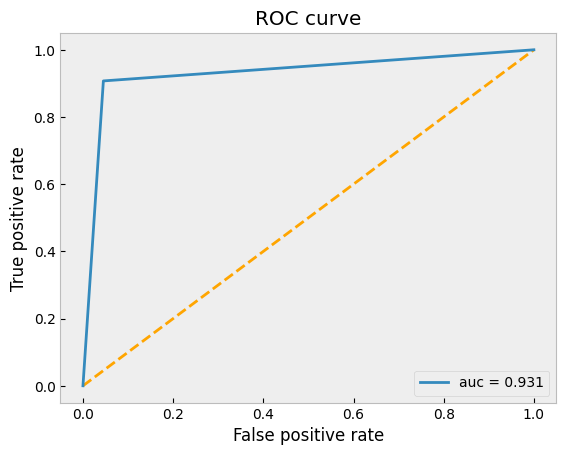

0.931013339948876

In [327]:
from sklearn.metrics import auc, roc_curve


def roc(testData,y_test,model):
    predictions_test = model.predict(testData)

    fpr, tpr, threshold = roc_curve(y_score=predictions_test, y_true=y_test)
    area_auc = auc(fpr, tpr)

    print('AUC: {:.3f}'.format(area_auc))
    plt.figure()
    plt.plot([0,1], [0,1], 'k--', color='orange')
    plt.plot(fpr, tpr, label='auc = {:.3f}'.format(area_auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    return (area_auc)

print("Modelo 1")
roc(X_test_esc,y_test,model_final)

Puede verse que el ajuste es de un 93%, por lo cual la curva ROC es buena.

In [328]:
paramns=params1
scaler = StandardScaler()
scaler.fit(X)
X_esc=X.copy()


best_model = linear_model.LogisticRegression(**paramns)
X_esc=scaler.transform(X)
best_model.fit(X_esc,Y)

LogisticRegression(class_weight='balanced', max_iter=200, n_jobs=-1,
                   solver='newton-cg')

Calculo el peso de las diferentes variables independientes en base al modelo entrenado

In [329]:
#Peso Bias B0
print("B0:",best_model.intercept_)
variables=X.columns
Bi=best_model.coef_
factores = pd.DataFrame({"BI": Bi[0], "VARIABLE": variables})
factores.BI=factores.BI.round(2)
factores

B0: [1.84643156]


,BI,VARIABLE
0,0.03,Rating
1,24.68,Reviews
2,0.11,Size
3,0.00,Price
4,0.15,Category_ART_AND_DESIGN
5,-0.03,Category_AUTO_AND_VEHICLES
6,-0.19,Category_BEAUTY
7,0.04,Category_BOOKS_AND_REFERENCE
8,0.02,Category_BUSINESS
9,-0.23,Category_COMICS


Calculo el peso de cada variable independientes que aporta a obtener una mayor variable dependiente. Mientras mas positivo el Odd_ratio, mas chances tendra de tener instalaciones mayores al promedio.

In [330]:
import math
#Factores de riesgo
factores['FACTOR']=False
factores['FACTOR']=factores.BI>0
factores['ODD']=np.exp(factores.BI) 
factores['PORCENTAJE_ODD']=(factores.ODD-1)*100
factores

,BI,VARIABLE,FACTOR,ODD,PORCENTAJE_ODD
0,0.03,Rating,True,1.030455e+00,3.045453e+00
1,24.68,Reviews,True,5.228629e+10,5.228629e+12
2,0.11,Size,True,1.116278e+00,1.162781e+01
3,0.00,Price,False,1.000000e+00,0.000000e+00
4,0.15,Category_ART_AND_DESIGN,True,1.161834e+00,1.618342e+01
5,-0.03,Category_AUTO_AND_VEHICLES,False,9.704455e-01,-2.955447e+00
6,-0.19,Category_BEAUTY,False,8.269591e-01,-1.730409e+01
7,0.04,Category_BOOKS_AND_REFERENCE,True,1.040811e+00,4.081077e+00
8,0.02,Category_BUSINESS,True,1.020201e+00,2.020134e+00
9,-0.23,Category_COMICS,False,7.945336e-01,-2.054664e+01


In [331]:
# Seteo para mostrar todas las columnas y todas las filas en pandas.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Filtro para obtener las primeras y ultimas 20 variables en base a sus porcentajes en diferentes dataframes.

In [332]:
df_filtered_positives = factores.sort_values(by="PORCENTAJE_ODD",ascending=False).head(20)
df_filtered_negatives = factores.sort_values(by="PORCENTAJE_ODD",ascending=True).head(20)


In [333]:
df_filtered_positives.head(5)

,BI,VARIABLE,FACTOR,ODD,PORCENTAJE_ODD
1,24.68,Reviews,True,5.228629e+10,5.228629e+12
35,0.40,Category_VIDEO_PLAYERS,True,1.491825e+00,4.918247e+01
86,0.31,Genre1_Casual,True,1.363425e+00,3.634251e+01
19,0.25,Category_HEALTH_AND_FITNESS,True,1.284025e+00,2.840254e+01
32,0.20,Category_SPORTS,True,1.221403e+00,2.214028e+01


Claramente las reviews es de lo mas importante a la hora de que una aplicacion sea instalada, por lo que procedo a filtrarla para que pueda verse las demas variables en un grafico comparativo.

In [334]:
df_filtered_positives = df_filtered_positives[df_filtered_positives['VARIABLE']!= 'Reviews']
df_filtered_positives

,BI,VARIABLE,FACTOR,ODD,PORCENTAJE_ODD
35,0.40,Category_VIDEO_PLAYERS,True,1.491825,49.182470
86,0.31,Genre1_Casual,True,1.363425,36.342511
19,0.25,Category_HEALTH_AND_FITNESS,True,1.284025,28.402542
32,0.20,Category_SPORTS,True,1.221403,22.140276
60,0.18,Android Ver_4.1 and up,True,1.197217,19.721736
123,0.18,Genre2_Action & Adventure,True,1.197217,19.721736
113,0.17,Genre1_Simulation,True,1.185305,18.530485
77,0.16,Genre1_Arcade,True,1.173511,17.351087
127,0.16,Genre2_Music & Video,True,1.173511,17.351087
4,0.15,Category_ART_AND_DESIGN,True,1.161834,16.183424


Realizo dos graficos de barras que mostraran las primeras y las ultimas 20 variables mas/menos significativas para entender como las mismas influyen en la cantidad de instalaciones.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Category_VIDEO_PLAYERS'),
  Text(1, 0, 'Genre1_Casual'),
  Text(2, 0, 'Category_HEALTH_AND_FITNESS'),
  Text(3, 0, 'Category_SPORTS'),
  Text(4, 0, 'Android Ver_4.1 and up'),
  Text(5, 0, 'Genre2_Action & Adventure'),
  Text(6, 0, 'Genre1_Simulation'),
  Text(7, 0, 'Genre1_Arcade'),
  Text(8, 0, 'Genre2_Music & Video'),
  Text(9, 0, 'Category_ART_AND_DESIGN'),
  Text(10, 0, 'Android Ver_5.0 - 8.0'),
  Text(11, 0, 'Android Ver_5.0 and up'),
  Text(12, 0, 'Android Ver_4.4 and up'),
  Text(13, 0, 'Genre1_Tools'),
  Text(14, 0, 'Android Ver_4.2 and up'),
  Text(15, 0, 'Category_TOOLS'),
  Text(16, 0, 'Category_PHOTOGRAPHY'),
  Text(17, 0, 'Genre1_Photography'),
  Text(18, 0, 'Size')])

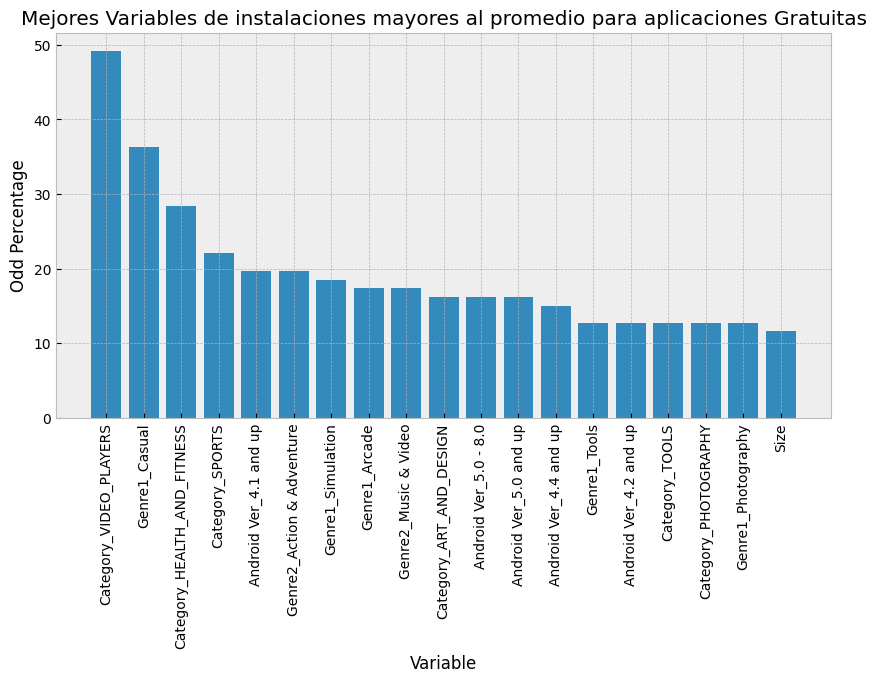

In [335]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(df_filtered_positives.VARIABLE,df_filtered_positives.PORCENTAJE_ODD)
ax.set_title('Mejores Variables de instalaciones mayores al promedio para aplicaciones Gratuitas')
ax.set_ylabel('Odd Percentage')
ax.set_xlabel('Variable')

plt.xticks(rotation=90)

In [336]:
df_filtered_positives = df_filtered_negatives[df_filtered_negatives['VARIABLE']!= 'Reviews']
df_filtered_positives

,BI,VARIABLE,FACTOR,ODD,PORCENTAJE_ODD
101,-0.49,Genre1_Medical,False,0.612626,-38.737361
24,-0.49,Category_MEDICAL,False,0.612626,-38.737361
15,-0.35,Category_FAMILY,False,0.704688,-29.531191
55,-0.30,Android Ver_3.2 and up,False,0.740818,-25.918178
96,-0.25,Genre1_Health & Fitness,False,0.778801,-22.119922
120,-0.24,Genre1_Video Players & Editors,False,0.786628,-21.337214
68,-0.23,Android Ver_5.1 and up,False,0.794534,-20.546640
87,-0.23,Genre1_Comics,False,0.794534,-20.546640
9,-0.23,Category_COMICS,False,0.794534,-20.546640
45,-0.20,Android Ver_1.5 and up,False,0.818731,-18.126925


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Genre1_Medical'),
  Text(1, 0, 'Category_MEDICAL'),
  Text(2, 0, 'Category_FAMILY'),
  Text(3, 0, 'Android Ver_3.2 and up'),
  Text(4, 0, 'Genre1_Health & Fitness'),
  Text(5, 0, 'Genre1_Video Players & Editors'),
  Text(6, 0, 'Android Ver_5.1 and up'),
  Text(7, 0, 'Genre1_Comics'),
  Text(8, 0, 'Category_COMICS'),
  Text(9, 0, 'Android Ver_1.5 and up'),
  Text(10, 0, 'Genre1_Events'),
  Text(11, 0, 'Category_EVENTS'),
  Text(12, 0, 'Genre1_Beauty'),
  Text(13, 0, 'Category_BEAUTY'),
  Text(14, 0, 'Android Ver_3.1 and up'),
  Text(15, 0, 'Category_PARENTING'),
  Text(16, 0, 'Genre1_Parenting'),
  Text(17, 0, 'Genre1_Sports'),
  Text(18, 0, 'Genre1_Books & Reference'),
  Text(19, 0, 'Genre1_Art & Design')])

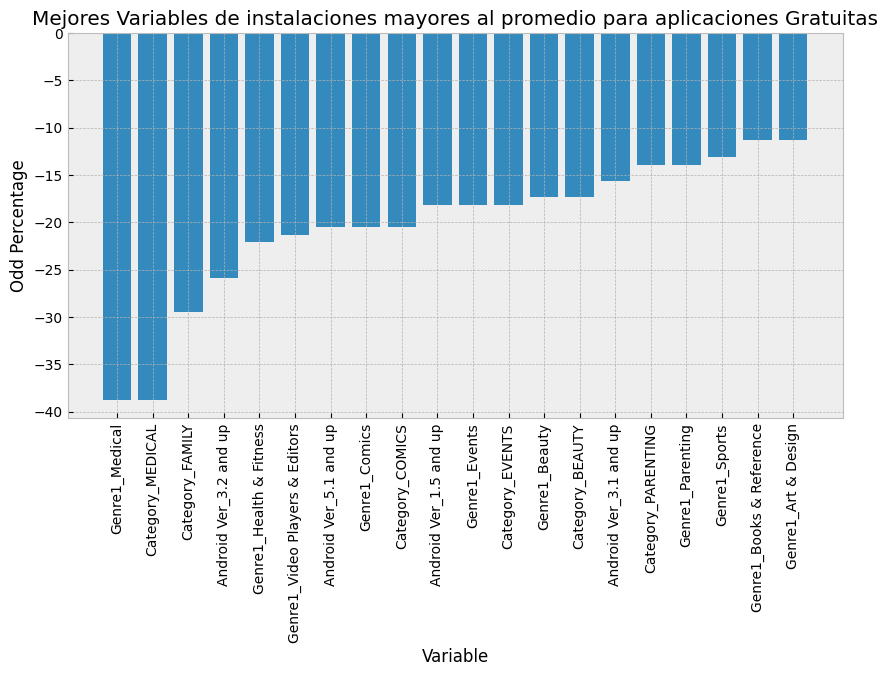

In [337]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(df_filtered_negatives.VARIABLE,df_filtered_negatives.PORCENTAJE_ODD)
ax.set_title('Mejores Variables de instalaciones mayores al promedio para aplicaciones Gratuitas')
ax.set_ylabel('Odd Percentage')
ax.set_xlabel('Variable')

plt.xticks(rotation=90)

Junto los Data Frames para generar un grafico individual con las mejores y peores variables.

In [338]:
data_frame_concat = pd.concat([df_filtered_positives, df_filtered_negatives], axis=0)
data_frame_concat_free = data_frame_concat.sort_values(by='PORCENTAJE_ODD',ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Genre1_Art & Design'),
  Text(1, 0, 'Genre1_Books & Reference'),
  Text(2, 0, 'Genre1_Sports'),
  Text(3, 0, 'Category_PARENTING'),
  Text(4, 0, 'Genre1_Parenting'),
  Text(5, 0, 'Android Ver_3.1 and up'),
  Text(6, 0, 'Genre1_Beauty'),
  Text(7, 0, 'Category_BEAUTY'),
  Text(8, 0, 'Genre1_Events'),
  Text(9, 0, 'Category_EVENTS'),
  Text(10, 0, 'Android Ver_1.5 and up'),
  Text(11, 0, 'Genre1_Comics'),
  Text(12, 0, 'Android Ver_5.1 and up'),
  Text(13, 0, 'Category_COMICS'),
  Text(14, 0, 'Genre1_Video Players & Editors'),
  Text(15, 0, 'Genre1_Health & Fitness'),
  Text(16, 0, 'Android Ver_3.2 and up'),
  Text(17, 0, 'Category_FAMILY'),
  Text(18, 0, 'Genre1_Medical'),
  Text(19, 0, 'Category_MEDICAL')])

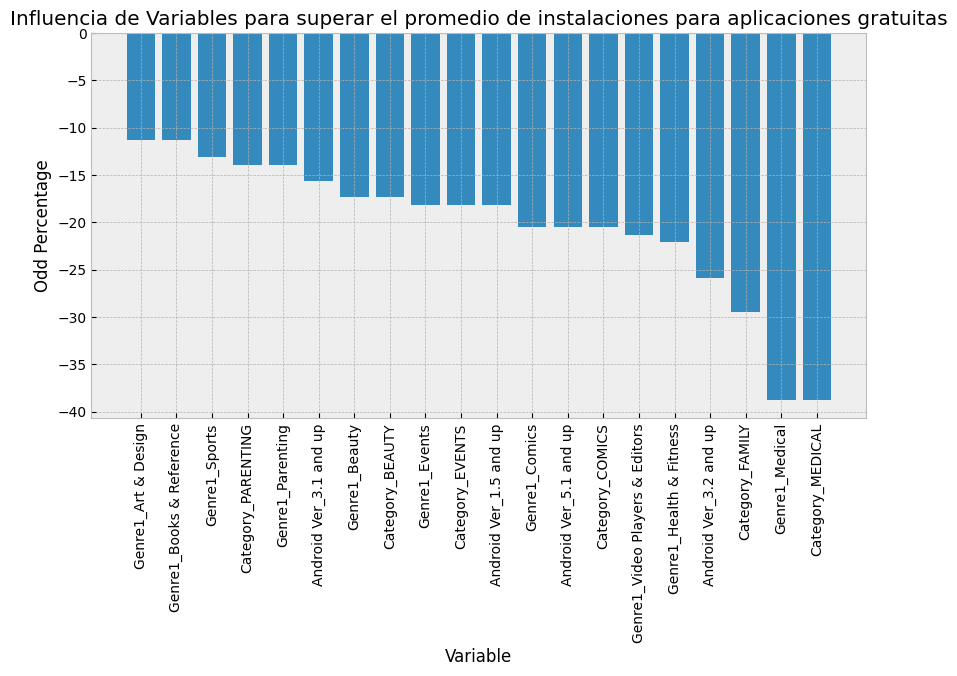

In [339]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data_frame_concat_free.VARIABLE,data_frame_concat_free.PORCENTAJE_ODD)
ax.set_title('Influencia de Variables para superar el promedio de instalaciones para aplicaciones gratuitas')
ax.set_ylabel('Odd Percentage')
ax.set_xlabel('Variable')

plt.xticks(rotation=90)

Como conclusión del análisis de las aplicaciones gratuitas, sabemos que las reviews son muy importantes, seguido de la categoría VIDEO_PLAYERS, GÉNERO CASUAL, categoría SPORTS, entre otras.
También vemos que la categoría medicina influye negativamente a la hora de ser gratuita, probablemente debido a que la gente desconfía en temas de salud al ser gratuita la aplicación.

### Type Paid

El análisis será similar al de tipos de aplicaciones gratuitas, por lo que desarrollare paso por paso lo hecho. Solo comentaré los resultados obtenidos.

In [340]:
df_no_nulls_rating_no_apps_paid = df_no_nulls_rating_no_apps[df_no_nulls_rating_no_apps['Type']=='Paid']

In [341]:
# genero un data set sin estandarizar
df_no_nulls_rating_dummies_new = pd.get_dummies(df_no_nulls_rating_no_apps_paid,drop_first=True)

# df_no_nulls_rating_dummies_new = pd.get_dummies(df_no_nulls_rating_no_apps_paid)

In [342]:
# Busco el promedio de las instalaciones
mean_installs = df_no_nulls_rating_dummies_new['Installs'].mean()

In [343]:
# genero una columna donde si las instalaciones son mayores al promedio sera True, sino False. Esto es para luego realizar una regresion logistica en base a las variables.
df_no_nulls_rating_dummies_new['above_average_installs'] = np.where(df_no_nulls_rating_dummies_new['Installs']>=mean_installs,True,False) 

In [344]:
# Checkeo que la columna haya funcionado correctamente
print(mean_installs)
df_no_nulls_rating_dummies_new[['Installs','above_average_installs']].head()

82365.94473229707


,Installs,above_average_installs
234,100000,True
235,100000,True
290,100000,True
291,100000,True
477,1000,False


In [345]:

# Dropeo installs para evitar sobreajuste
#df_no_nulls_rating_dummies_new = df_no_nulls_rating_dummies_new.drop(columns=['Installs','Type_Paid'])
df_no_nulls_rating_dummies_new = df_no_nulls_rating_dummies_new.drop(columns=['Installs'])

In [346]:
Y=df_no_nulls_rating_dummies_new['above_average_installs']
X=df_no_nulls_rating_dummies_new.drop(columns=['above_average_installs'])

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)
# Show the results of the split
print("Total ejemplos train {}.".format(X_train.shape[0]))
print("Total ejemplos test {}.".format(X_test.shape[0]))


print("Above_average train:",y_train[y_train==1].count())
print("Below_average train:",y_train[y_train==0].count())

print("Above_average test:",y_test[y_test==1].count())
print("Below_average test",y_test[y_test==0].count())

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)


X_train_esc=X_train.copy()
X_test_esc=X_test.copy()

Total ejemplos train 405.
Total ejemplos test 174.
Above_average train: 75
Below_average train: 330
Above_average test: 28
Below_average test 146


In [348]:
# escalo datos
# X_train_esc=scaler.transform(X_train)
# X_test_esc=scaler.transform(X_test)

In [349]:
print("1 model")
model1 = linear_model.LogisticRegression()
model1.fit(X_train_esc,y_train)

1 model


LogisticRegression()

In [350]:
from sklearn.metrics import classification_report

def eval_model(testData,trainingData,y_test,y_train,model):
    predictions_test = model.predict(testData)
    predictions_train = model.predict(trainingData)
    # Select (prediction, true label) and compute test error
    print("accuracy test:",accuracy_score(y_test, predictions_test))
    print("accuracy train:",accuracy_score(y_train, predictions_train))
    
    print("Balanced_accuracy test:",balanced_accuracy_score(y_test, predictions_test))
    print("Balanced_accuracy train:",balanced_accuracy_score(y_train, predictions_train))
    
    print(classification_report(y_test,predictions_test))
      
    return (balanced_accuracy_score(y_test, predictions_test))
print("_________________________________________")
print("Modelo 1")
eval_model(X_test_esc,X_train_esc,y_test,y_train,model1)

_________________________________________
Modelo 1
accuracy test: 0.8850574712643678
accuracy train: 0.8592592592592593
Balanced_accuracy test: 0.8449119373776908
Balanced_accuracy train: 0.8569696969696969
              precision    recall  f1-score   support

       False       0.96      0.90      0.93       146
        True       0.61      0.79      0.69        28

    accuracy                           0.89       174
   macro avg       0.78      0.84      0.81       174
weighted avg       0.90      0.89      0.89       174



0.8449119373776908

In [351]:
from sklearn.model_selection import GridSearchCV

def _score_func(estimator, X, y):
    y_pred_test = estimator.predict(X)
    return f1_score(y, y_pred_test)

class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold,scoring=_score_func,
        n_jobs=-1)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.f1_score(Y, self.predictions)))


In [352]:
%%time
gb = Class_Fit(clf = linear_model.LogisticRegression)
param_grid = {
             'class_weight':['balanced',{0:1,1:20},{0:0.5,1:0.5}],
              'solver':['lbfgs', 'liblinear', 'newton-cg'],
              'n_jobs':[-1],
               'max_iter':[200]
              }

gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X = X_train, Y = y_train)

print("Parámetros RL:",gb.grid.best_params_)
mejor_arbol=gb.grid.best_estimator_

Parámetros RL: {'class_weight': {0: 0.5, 1: 0.5}, 'max_iter': 200, 'n_jobs': -1, 'solver': 'newton-cg'}
CPU times: total: 62.5 ms
Wall time: 459 ms


In [353]:
params1= {'class_weight': 'balanced', 'max_iter': 200, 'n_jobs': -1, 'solver': 'newton-cg'}

In [354]:
model_final = linear_model.LogisticRegression(**params1)
model_final.fit(X_train_esc,y_train)


LogisticRegression(class_weight='balanced', max_iter=200, n_jobs=-1,
                   solver='newton-cg')

In [355]:
print("FINAL 1")
eval_model(X_test_esc,X_train_esc,y_test,y_train,model_final)
print("_________________________________________")

FINAL 1
accuracy test: 0.9597701149425287
accuracy train: 0.9555555555555556
Balanced_accuracy test: 0.9182974559686888
Balanced_accuracy train: 0.9521212121212121
              precision    recall  f1-score   support

       False       0.97      0.98      0.98       146
        True       0.89      0.86      0.87        28

    accuracy                           0.96       174
   macro avg       0.93      0.92      0.92       174
weighted avg       0.96      0.96      0.96       174

_________________________________________


Modelo 1
AUC: 0.918


C:\Users\Vuljein\AppData\Local\Temp\ipykernel_42748\419101339.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1], [0,1], 'k--', color='orange')


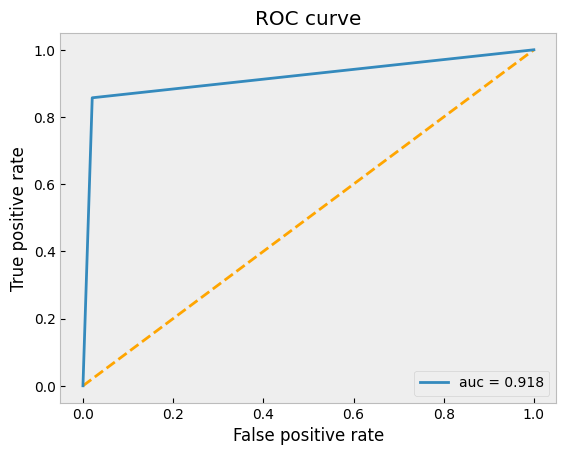

0.9182974559686888

In [356]:
from sklearn.metrics import auc, roc_curve


def roc(testData,y_test,model):
    predictions_test = model.predict(testData)

    fpr, tpr, threshold = roc_curve(y_score=predictions_test, y_true=y_test)
    area_auc = auc(fpr, tpr)

    print('AUC: {:.3f}'.format(area_auc))
    plt.figure()
    plt.plot([0,1], [0,1], 'k--', color='orange')
    plt.plot(fpr, tpr, label='auc = {:.3f}'.format(area_auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    return (area_auc)

print("Modelo 1")
roc(X_test_esc,y_test,model_final)

In [357]:
paramns=params1
scaler = StandardScaler()
scaler.fit(X)
X_esc=X.copy()

In [358]:
best_model = linear_model.LogisticRegression(**paramns)
X_esc=scaler.transform(X)
best_model.fit(X_esc,Y)

LogisticRegression(class_weight='balanced', max_iter=200, n_jobs=-1,
                   solver='newton-cg')

In [359]:
#Peso Bias B0
print("B0:",best_model.intercept_)
variables=X.columns
Bi=best_model.coef_
factores = pd.DataFrame({"BI": Bi[0], "VARIABLE": variables})
factores.BI=factores.BI.round(2)
factores

B0: [-1.00467707]


,BI,VARIABLE
0,0.51,Rating
1,7.08,Reviews
2,0.01,Size
3,0.39,Price
4,-0.15,Category_BOOKS_AND_REFERENCE
5,0.13,Category_BUSINESS
6,0.10,Category_COMMUNICATION
7,-0.06,Category_DATING
8,0.31,Category_EDUCATION
9,0.46,Category_ENTERTAINMENT


In [360]:
import math
#Factores de riesgo
factores['FACTOR']=False
factores['FACTOR']=factores.BI>0
factores['ODD']=np.exp(factores.BI) 
factores['PORCENTAJE_ODD']=(factores.ODD-1)*100
factores


,BI,VARIABLE,FACTOR,ODD,PORCENTAJE_ODD
0,0.51,Rating,True,1.665291,66.529119
1,7.08,Reviews,True,1187.968519,118696.851851
2,0.01,Size,True,1.010050,1.005017
3,0.39,Price,True,1.476981,47.698079
4,-0.15,Category_BOOKS_AND_REFERENCE,False,0.860708,-13.929202
5,0.13,Category_BUSINESS,True,1.138828,13.882838
6,0.10,Category_COMMUNICATION,True,1.105171,10.517092
7,-0.06,Category_DATING,False,0.941765,-5.823547
8,0.31,Category_EDUCATION,True,1.363425,36.342511
9,0.46,Category_ENTERTAINMENT,True,1.584074,58.407398


In [361]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [362]:
# Graficar factores bar plot con las mejores 10 variables
df_filtered_positives = factores.sort_values(by="PORCENTAJE_ODD",ascending=False).head(20)
df_filtered_negatives = factores.sort_values(by="PORCENTAJE_ODD",ascending=True).head(20)

In [363]:
df_filtered_positives = df_filtered_positives[df_filtered_positives['VARIABLE']!= 'Reviews']
df_filtered_positives

,BI,VARIABLE,FACTOR,ODD,PORCENTAJE_ODD
87,0.87,Genre1_Sports,True,2.386911,138.691085
0,0.51,Rating,True,1.665291,66.529119
97,0.51,Genre2_Pretend Play,True,1.665291,66.529119
9,0.46,Category_ENTERTAINMENT,True,1.584074,58.407398
13,0.41,Category_GAME,True,1.506818,50.681779
3,0.39,Price,True,1.476981,47.698079
49,0.38,Android Ver_5.0 and up,True,1.462285,46.228459
81,0.36,Genre1_Puzzle,True,1.433329,43.332941
83,0.35,Genre1_Role Playing,True,1.419068,41.906755
42,0.34,Android Ver_4.0 and up,True,1.404948,40.494759


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Genre1_Sports'),
  Text(1, 0, 'Rating'),
  Text(2, 0, 'Genre2_Pretend Play'),
  Text(3, 0, 'Category_ENTERTAINMENT'),
  Text(4, 0, 'Category_GAME'),
  Text(5, 0, 'Price'),
  Text(6, 0, 'Android Ver_5.0 and up'),
  Text(7, 0, 'Genre1_Puzzle'),
  Text(8, 0, 'Genre1_Role Playing'),
  Text(9, 0, 'Android Ver_4.0 and up'),
  Text(10, 0, 'Genre1_Strategy'),
  Text(11, 0, 'Category_EDUCATION'),
  Text(12, 0, 'Android Ver_2.1 and up'),
  Text(13, 0, 'Android Ver_2.3.3 and up'),
  Text(14, 0, 'Genre2_Brain Games'),
  Text(15, 0, 'Android Ver_1.6 and up'),
  Text(16, 0, 'Android Ver_2.0 and up'),
  Text(17, 0, 'Category_MEDICAL'),
  Text(18, 0, 'Category_PHOTOGRAPHY')])

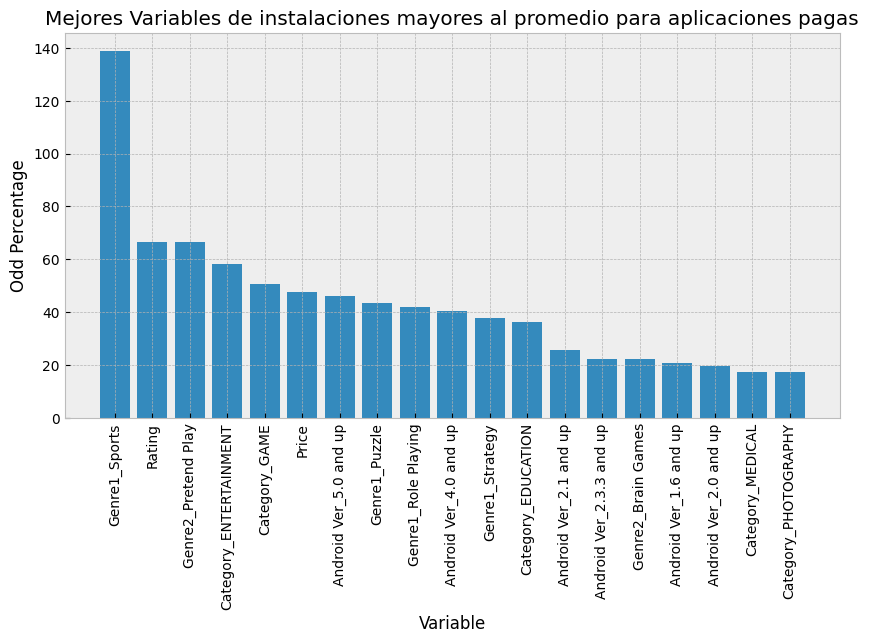

In [364]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(df_filtered_positives.VARIABLE,df_filtered_positives.PORCENTAJE_ODD)
ax.set_title('Mejores Variables de instalaciones mayores al promedio para aplicaciones pagas')
ax.set_ylabel('Odd Percentage')
ax.set_xlabel('Variable')

plt.xticks(rotation=90)

In [368]:
df_filtered_negatives = df_filtered_negatives[df_filtered_negatives['VARIABLE']!= 'Reviews']
df_filtered_negatives

,BI,VARIABLE,FACTOR,ODD,PORCENTAJE_ODD
25,-1.10,Category_SPORTS,False,0.332871,-66.712892
66,-0.77,Genre1_Education,False,0.463013,-53.698693
68,-0.44,Genre1_Entertainment,False,0.644036,-35.596358
52,-0.36,Android Ver_7.0 and up,False,0.697676,-30.232367
41,-0.30,Android Ver_3.2 and up,False,0.740818,-25.918178
61,-0.25,Genre1_Card,False,0.778801,-22.119922
35,-0.24,Android Ver_2.0.1 and up,False,0.786628,-21.337214
48,-0.21,Android Ver_4.4W and up,False,0.810584,-18.941575
82,-0.21,Genre1_Racing,False,0.810584,-18.941575
58,-0.20,Genre1_Board,False,0.818731,-18.126925


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Category_SPORTS'),
  Text(1, 0, 'Genre1_Education'),
  Text(2, 0, 'Genre1_Entertainment'),
  Text(3, 0, 'Android Ver_7.0 and up'),
  Text(4, 0, 'Android Ver_3.2 and up'),
  Text(5, 0, 'Genre1_Card'),
  Text(6, 0, 'Android Ver_2.0.1 and up'),
  Text(7, 0, 'Android Ver_4.4W and up'),
  Text(8, 0, 'Genre1_Racing'),
  Text(9, 0, 'Genre1_Board'),
  Text(10, 0, 'Android Ver_5.1 and up'),
  Text(11, 0, 'Genre1_Books & Reference'),
  Text(12, 0, 'Genre1_Tools'),
  Text(13, 0, 'Content Rating_Teen'),
  Text(14, 0, 'Category_TOOLS'),
  Text(15, 0, 'Genre1_Casual'),
  Text(16, 0, 'Genre2_Music & Video'),
  Text(17, 0, 'Genre1_Art & Design'),
  Text(18, 0, 'Category_BOOKS_AND_REFERENCE'),
  Text(19, 0, 'Android Ver_6.0 and up')])

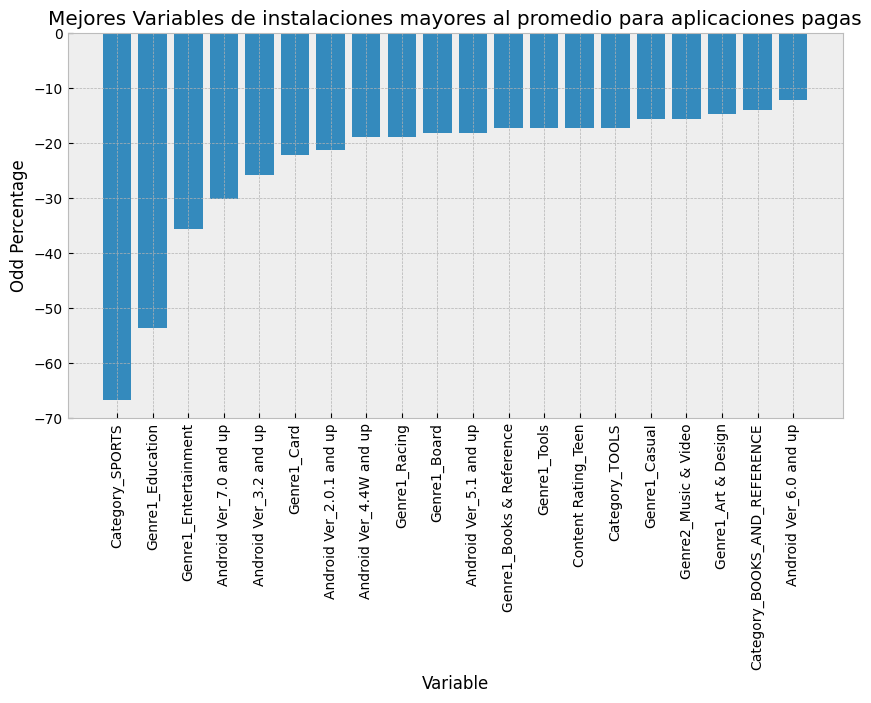

In [365]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(df_filtered_negatives.VARIABLE,df_filtered_negatives.PORCENTAJE_ODD)
ax.set_title('Mejores Variables de instalaciones mayores al promedio para aplicaciones pagas')
ax.set_ylabel('Odd Percentage')
ax.set_xlabel('Variable')

plt.xticks(rotation=90)

In [366]:
# junto los Data Frames para generar un grafico individual con las mejores y peores variables.
data_frame_concat = pd.concat([df_filtered_positives, df_filtered_negatives], axis=0)
data_frame_concat_paid = data_frame_concat.sort_values(by='PORCENTAJE_ODD',ascending=False)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Genre1_Sports'),
  Text(1, 0, 'Rating'),
  Text(2, 0, 'Genre2_Pretend Play'),
  Text(3, 0, 'Category_ENTERTAINMENT'),
  Text(4, 0, 'Category_GAME'),
  Text(5, 0, 'Price'),
  Text(6, 0, 'Android Ver_5.0 and up'),
  Text(7, 0, 'Genre1_Puzzle'),
  Text(8, 0, 'Genre1_Role Playing'),
  Text(9, 0, 'Android Ver_4.0 and up'),
  Text(10, 0, 'Genre1_Strategy'),
  Text(11, 0, 'Category_EDUCATION'),
  Text(12, 0, 'Android Ver_2.1 and up'),
  Text(13, 0, 'Android Ver_2.3.3 and up'),
  Text(14, 0, 'Genre2_Brain Games'),
  Text(15, 0, 'Android Ver_1.6 and up'),
  Text(16, 0, 'Android Ver_2.0 and up'),
  Text(17, 0, 'Category_MEDICAL'),
  Text(18, 0, 'Category_PHOTOGRAPHY'),
  Text(19, 0, 'Android Ver_6.0 and up'),
  Text(20, 0, 'Category_BOOKS_AND_REFERENCE'),
  Tex

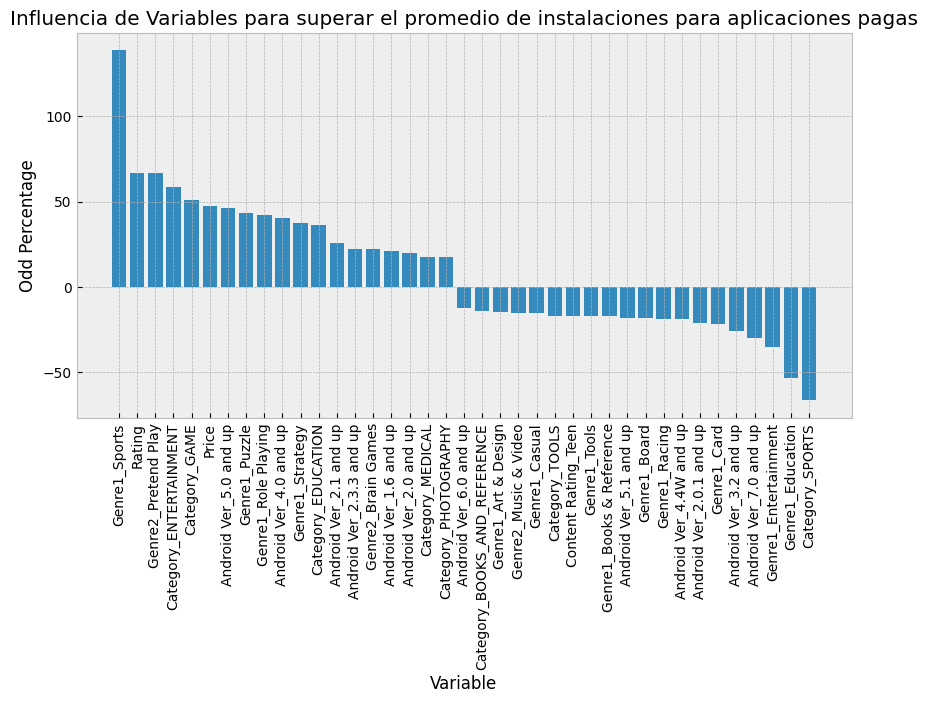

In [367]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data_frame_concat_paid.VARIABLE,data_frame_concat_paid.PORCENTAJE_ODD)
ax.set_title('Influencia de Variables para superar el promedio de instalaciones para aplicaciones pagas')
ax.set_ylabel('Odd Percentage')
ax.set_xlabel('Variable')

plt.xticks(rotation=90)

Como conclusión entonces vemos que para las aplicaciones pagas, las de género de deporte son las más influyentes, y el rating pasa a ser bastante importante a la hora de influir en las instalaciones de aplicaciones. Y vemos que las del género de educación impactan negativamente. Habría que analizar correctamente porque la categoría sports impacta negativamente. Tal vez solo convenga quedarse con género y no utilizar las categorías o viceversa.

### Presentación sin descripcion técnica.

Hola, mi nombre es Pablo Delucchi. Soy Cientifico de datos y con mi equipo estuvimos realizando un analisis de las diferentes aplicaciones en playstore, para asi obtener que tipo de aplicaciones son las mejores a la hora de lanzar una nueva aplicacion al mercado.
Dicho esto, mediante dos modelos de regresion logistica, uno para aplicaciones gratuitas y otro para pagas, obtuvimos cuales son las mejores variables dependiendo del tipo de aplicacion.

Para las gratuitas, obtuvimos los siguientes resultados:

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Category_VIDEO_PLAYERS'),
  Text(1, 0, 'Genre1_Casual'),
  Text(2, 0, 'Category_HEALTH_AND_FITNESS'),
  Text(3, 0, 'Category_SPORTS'),
  Text(4, 0, 'Android Ver_4.1 and up'),
  Text(5, 0, 'Genre2_Action & Adventure'),
  Text(6, 0, 'Genre1_Simulation'),
  Text(7, 0, 'Genre1_Arcade'),
  Text(8, 0, 'Genre2_Music & Video'),
  Text(9, 0, 'Android Ver_5.0 and up'),
  Text(10, 0, 'Category_ART_AND_DESIGN'),
  Text(11, 0, 'Android Ver_5.0 - 8.0'),
  Text(12, 0, 'Android Ver_4.4 and up'),
  Text(13, 0, 'Genre1_Tools'),
  Text(14, 0, 'Android Ver_4.2 and up'),
  Text(15, 0, 'Category_TOOLS'),
  Text(16, 0, 'Category_PHOTOGRAPHY'),
  Text(17, 0, 'Genre1_Photography'),
  Text(18, 0, 'Size'),
  Text(19, 0, 'Genre1_Books & Reference'),
  Text(20, 0, 'Genre1_Art & D

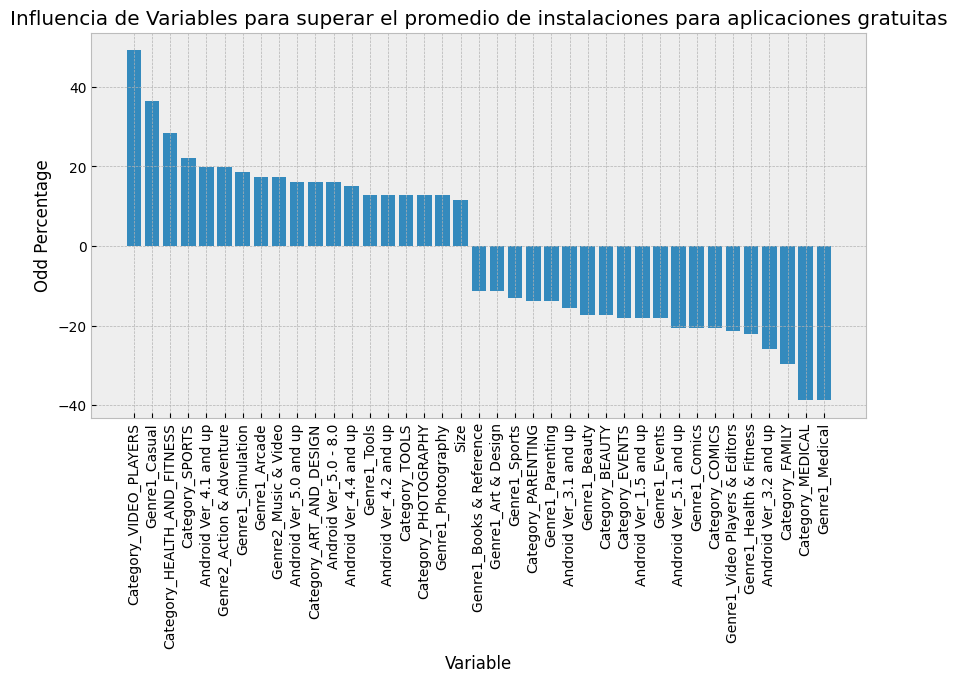

In [307]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data_frame_concat_free.VARIABLE,data_frame_concat_free.PORCENTAJE_ODD)
ax.set_title('Influencia de Variables para superar el promedio de instalaciones para aplicaciones gratuitas')
ax.set_ylabel('Odd Percentage')
ax.set_xlabel('Variable')

plt.xticks(rotation=90)

Como conclusión del análisis de las aplicaciones gratuitas, sabemos que las reviews son muy importantes, seguido de la categoría VIDEO_PLAYERS, GÉNERO CASUAL, categoría SPORTS, entre otras.
También vemos que la categoría medicina influye negativamente a la hora de ser gratuita, probablemente debido a que la gente desconfía en temas de salud al ser gratuita la aplicación.

Para las pagas, obtuvimos lo siguiente:

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Genre1_Sports'),
  Text(1, 0, 'Rating'),
  Text(2, 0, 'Genre2_Pretend Play'),
  Text(3, 0, 'Category_ENTERTAINMENT'),
  Text(4, 0, 'Category_GAME'),
  Text(5, 0, 'Price'),
  Text(6, 0, 'Android Ver_5.0 and up'),
  Text(7, 0, 'Genre1_Puzzle'),
  Text(8, 0, 'Genre1_Role Playing'),
  Text(9, 0, 'Android Ver_4.0 and up'),
  Text(10, 0, 'Genre1_Strategy'),
  Text(11, 0, 'Category_EDUCATION'),
  Text(12, 0, 'Android Ver_2.1 and up'),
  Text(13, 0, 'Android Ver_2.3.3 and up'),
  Text(14, 0, 'Genre2_Brain Games'),
  Text(15, 0, 'Android Ver_1.6 and up'),
  Text(16, 0, 'Android Ver_2.0 and up'),
  Text(17, 0, 'Category_MEDICAL'),
  Text(18, 0, 'Category_PHOTOGRAPHY'),
  Text(19, 0, 'Android Ver_6.0 and up'),
  Text(20, 0, 'Category_BOOKS_AND_REFERENCE'),
  Tex

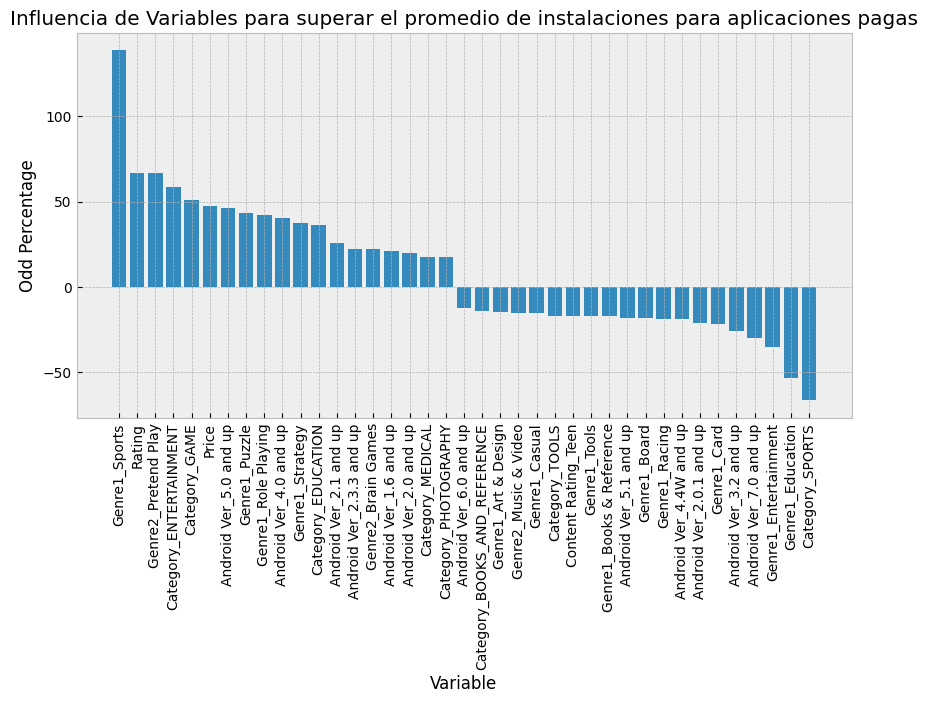

In [308]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data_frame_concat_paid.VARIABLE,data_frame_concat_paid.PORCENTAJE_ODD)
ax.set_title('Influencia de Variables para superar el promedio de instalaciones para aplicaciones pagas')
ax.set_ylabel('Odd Percentage')
ax.set_xlabel('Variable')

plt.xticks(rotation=90)

Como conclusión para las aplicaciones pagas vemos que las de género de deporte son las más influyentes, y el rating pasa a ser bastante importante a la hora de influir en las instalaciones de aplicaciones. Y vemos que las del género de educación impactan negativamente.